<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Kaggle Challenges House Prices (Regression)



### Group 5 team members:

- Raghad Alharbi
- Fatimah Aljohani
- Hessah Hamed Alkhattabi

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png">


## Problem Statment

As a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. However, we can confidently say that more attributes influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, we built a machine learning model that predicts the final price of each home.

## Executive Summary

As a second project in our Data Science Immersive Course with General Assembly and MiSK Academy, we were asked to finish this "House Prices" Competition in Kaggle, We used multiple data cleaning methods, employed EDA methods including a good number of visualizations, to get to know the data well. Finally, we applied multiple machine learning methods in order to predict the Sale Price of the houses in the test data set. We achieved an amazing score that we are very proud of. 
 
 
 Root-Mean-Squared-Error (RMSE)  = 0.11890

## Kaggle Competition Score:

![image info](../score/Group5_score.png)

![image info](../score/Group5_ranking_score.png)

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Datasets Description

#### We were provided with four datasets to complete this challange:
- train.csv - the training set ( with 81 columns, and 1460 rows)
- test.csv - the test set (with 80 columns, and 1460 rows)
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## Data Cleaning and Exploratory Data Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# all the used libraries in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats

from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from xgboost import XGBRegressor # just for fun :) 
from scipy.special import boxcox, inv_boxcox
 
plt.style.use('ggplot')
sns.set(font_scale = 1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Pallets used for visualizations
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'

#### 1. Read CSV file

In [3]:
# Kaggle kernel files
#df_full = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
#test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# JupyterNotebook files
df_full = pd.read_csv('../datasets/train.csv')
test_df = pd.read_csv('../datasets/test.csv')

In [4]:
df = df_full

test_df['SalePrice'] = 0
# saving the IDs for the first and last data point in the test set 
# because we will be merging both train and test
test_first_id = test_df['Id'].iloc[0]
test_last_id = test_df['Id'].iloc[-1]

In [5]:
pd.set_option('display.max_columns', None)

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [6]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [8]:
# Combining both train and test datasets
df = df.append(test_df, ignore_index = True)

In [9]:
#Making sure that test set was appended to the main df
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2914  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2915  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2916  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2917  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2918  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2914         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2915         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2916         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2917         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2918         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2914       Norm    Twnhs     2Story            4            7       1970   
2915       Norm   TwnhsE     2Story            4            5       1970   
2916       Norm     1Fam     1Story            5            7       1960   
2917       Norm     1Fam     SFoyer            5            5       1992   
2918       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2914          1970     Gable  CompShg     CemntBd     CmentBd       None   
2915          1970     Gable  CompShg     CemntBd     CmentBd       None   
2916          1996     Gable  CompShg     VinylSd     VinylSd       None   
2917          1992     Gable  CompShg     HdBoard     Wd Shng       None   
2918          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2914         0.0        TA        TA     CBlock       TA       TA   
2915         0.0        TA        TA     CBlock       TA       TA   
2916         0.0        TA        TA     CBlock       TA       TA   
2917         0.0        TA        TA      PConc       Gd       TA   
2918        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2914           No          Unf         0.0          Unf         0.0   
2915           No          Rec       252.0          Unf         0.0   
2916           No          ALQ      1224.0          Unf         0.0   
2917           Av          GLQ       337.0          Unf         0.0   
2918           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2914      546.0        546.0    GasA        Gd          Y      SBrkr   
2915      294.0        546.0    GasA        TA          Y      SBrkr   
2916        0.0       1224.0    GasA        Ex          Y      SBrkr   
2917      575.0        912.0    GasA        TA          Y      SBrkr   
2918      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2914       546       546             0       1092           0.0           0.0   
2915       546       546             0       1092           0.0           0.0   
2916      1224         0             0       1224           1.0           0.0   
2917       970         0             0        970           0.0           1.0   
2918       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2914         1         1             3             1          TA   
2915         1         1             3             1          TA   
2916         1         0             4             1          TA   
2917         1         0             3             1          TA   
2918         2         1             3             1          TA   

   

#### 3. Briefly describe the data

Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

In [10]:
df.shape

(2919, 81)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

#### 4a. How complete is the data? and any Issues

In [12]:
df.isna().sum()[df.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [13]:
#Finding missing data and the percentage of it in each column
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])
missing_data.head(20)

Total_NaN  Percent_Nan
PoolQC             2909     0.996574
MiscFeature        2814     0.964029
Alley              2721     0.932169
Fence              2348     0.804385
FireplaceQu        1420     0.486468
LotFrontage         486     0.166495
GarageCond          159     0.054471
GarageYrBlt         159     0.054471
GarageFinish        159     0.054471
GarageQual          159     0.054471
GarageType          157     0.053786
BsmtCond             82     0.028092
BsmtExposure         82     0.028092
BsmtQual             81     0.027749
BsmtFinType2         80     0.027407
BsmtFinType1         79     0.027064
MasVnrType           24     0.008222
MasVnrArea           23     0.007879
MSZoning              4     0.001370
Utilities             2     0.000685

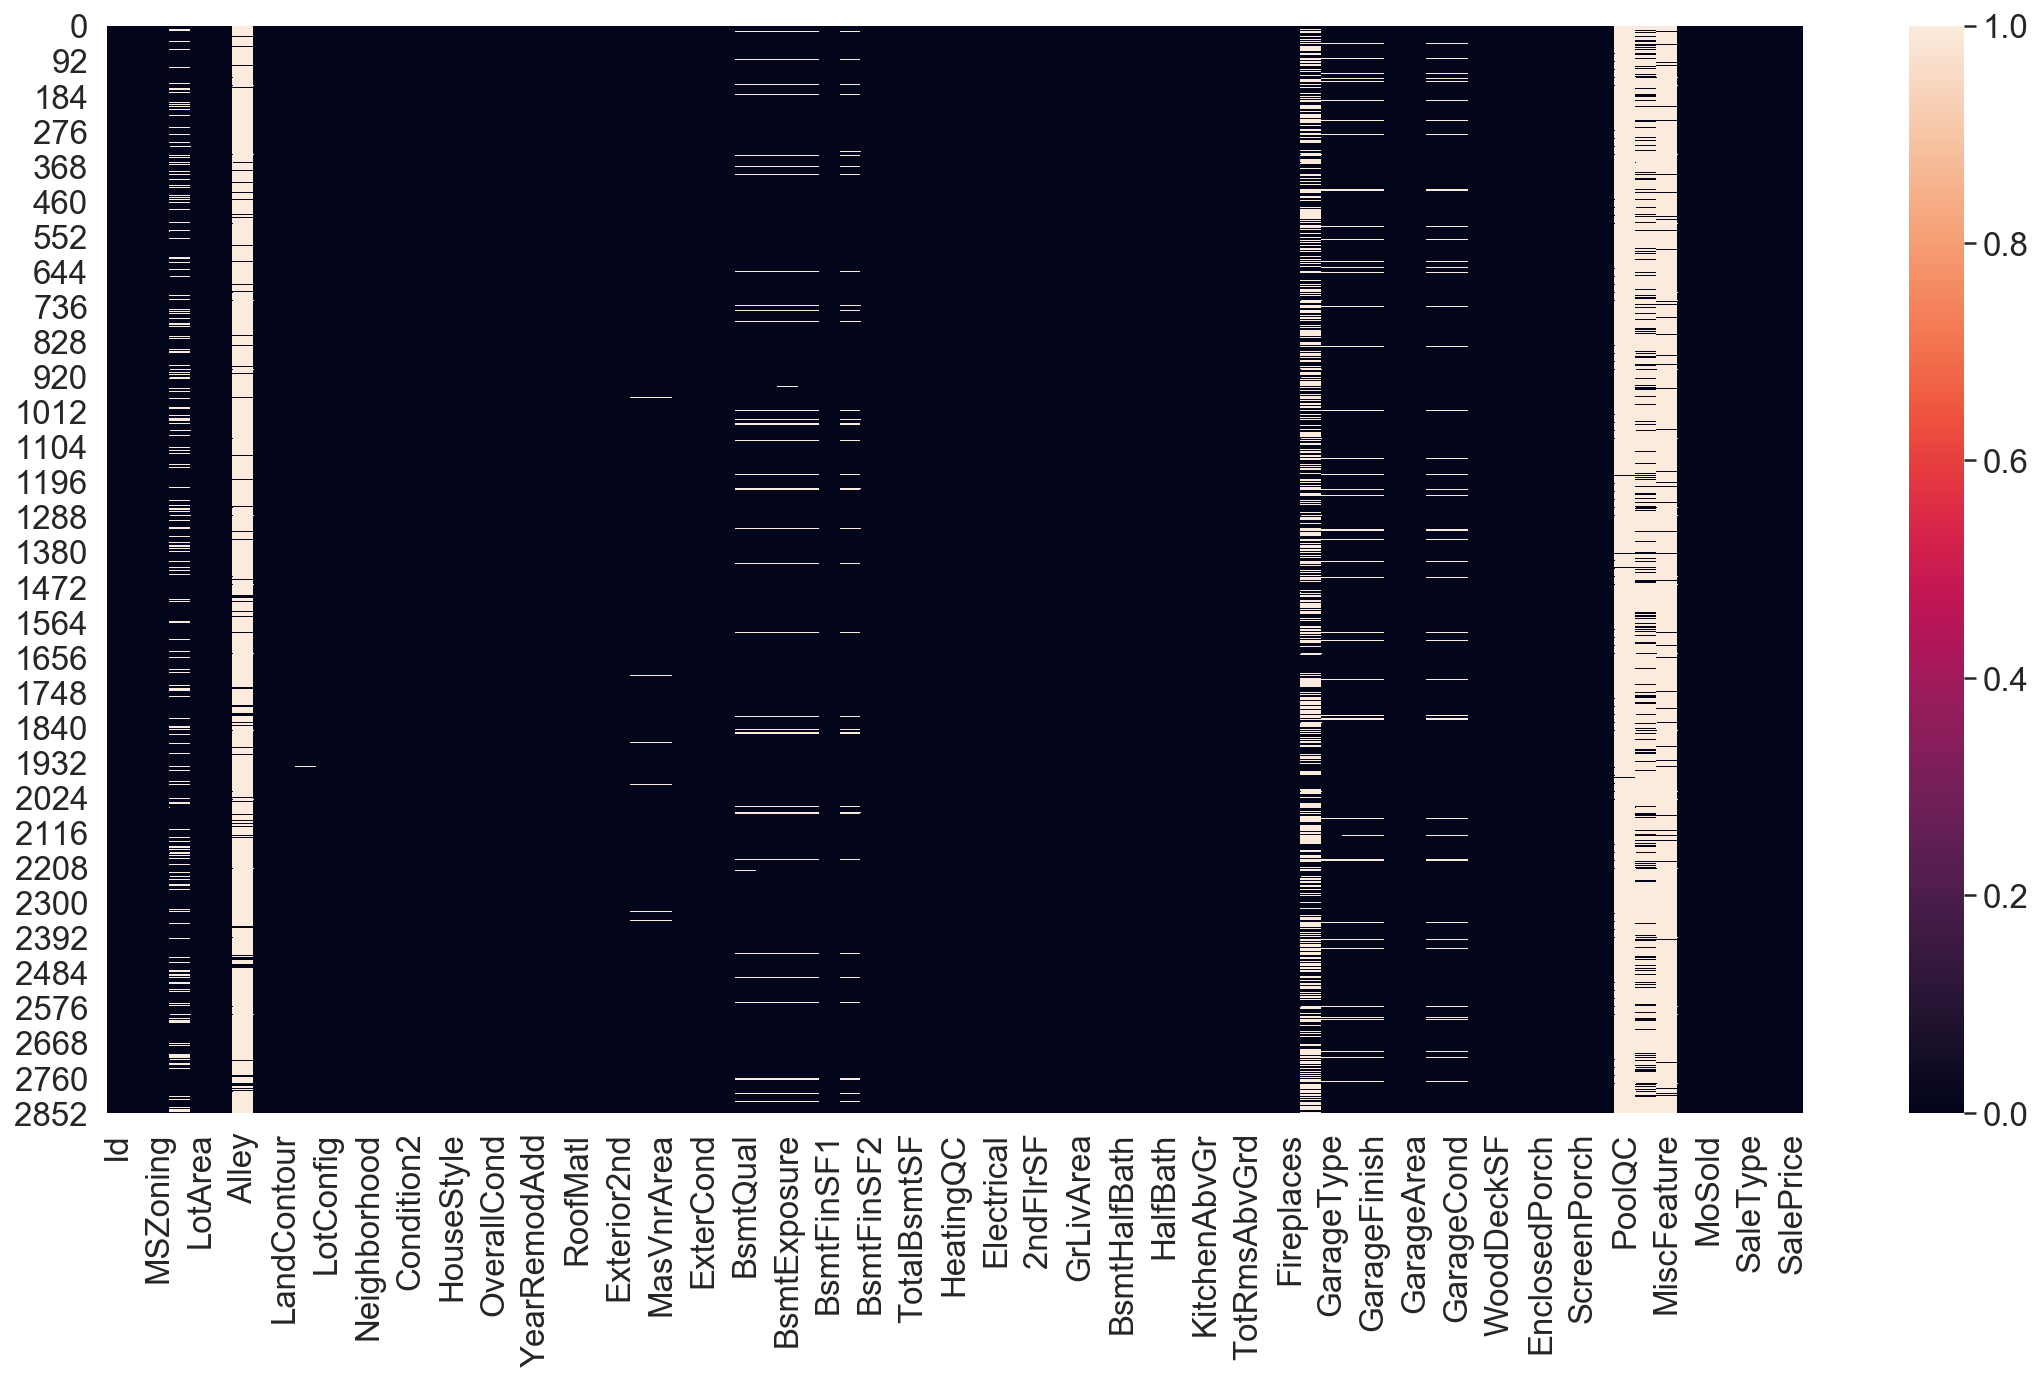

In [14]:
#visualize the missing data 
plt.figure(figsize = (19, 10))
sns.heatmap(data = df.isnull())

In [15]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

#### 5. What are your data types? 

In [17]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

#### 6. fill null values

In [18]:
# fill missing values with NA in Categorical Columns
cat_bsmt_col = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
cat_multi_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
cat_Garage_col = ['GarageType', 'GarageCond', 'GarageFinish', 'GarageQual']

df[cat_bsmt_col] = df[cat_bsmt_col].fillna('No_Basement')
df[cat_multi_col] = df[cat_multi_col].fillna('No')
df[cat_Garage_col] = df[cat_Garage_col].fillna('No_Garage')
df['MasVnrType']= df['MasVnrType'].fillna('No_MasVnr')

# numerical values
df['Electrical'].fillna(df['Electrical'].mode().iloc[0], inplace = True)
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True) #right skewed
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace = True) #left skewed
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace = True) 

In [19]:
# check if all columns are  filled 
df.isna().sum().sum()

22

In [20]:
# These are the null in test
df.isna().sum()[df.isnull().sum() > 0].sort_values(ascending = False)

MSZoning        4
Functional      2
BsmtHalfBath    2
BsmtFullBath    2
Utilities       2
SaleType        1
GarageArea      1
GarageCars      1
KitchenQual     1
TotalBsmtSF     1
BsmtUnfSF       1
BsmtFinSF2      1
BsmtFinSF1      1
Exterior2nd     1
Exterior1st     1
dtype: int64

In [21]:
# fill missing data with mode as there are very few missing data
# we do not need to use other complex methods for filling data
df.fillna(df.mode().iloc[0], inplace = True)
df.isna().sum().sum()

0

In [22]:
# head of categorical columns
df[df.select_dtypes('object').columns].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave    No      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave    No      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave    No      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave    No      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ          No     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y     No    No          No   
1          RFn         TA         TA          Y     No    No          No   
2          RFn         TA         TA          Y     No    No          No   
3          Unf         TA         TA          Y     No    No          No   
4          RFn         TA         TA          Y     No    No          No   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [23]:
# head of numerical columns
df[df.select_dtypes('number').columns].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0       706.0         0.0      150.0        856.0   
1          1976         0.0       978.0         0.0      284.0       1262.0   
2          2002       162.0       486.0         0.0      434.0        920.0   
3          1970         0.0       216.0         0.0      540.0        756.0   
4          2000       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710           1.0           0.0   
1      1262         0             0       1262           0.0           1.0   
2       920       866             0       1786           1.0           0.0   
3       961       756             0       1717           1.0           0.0   
4      1145      1053             0       2198           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0         2.0       548.0           0           61   
1       1976.0         2.0       460.0         298            0   
2       2001.0         2.0       608.0           0           42   
3       1998.0         3.0       642.0           0           35   
4       2000.0         3.0       836.0         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

## Converting Categorical values that are considered rankings to numerical 

### workflow steps:
    1- Convert all columns that are rankings to numbers
    2- check models preformace (got worst)
    3- Find corretaion to Sale Prices
    4- Recording corr values for reference
    5- Proceed with converting for only columns that have high corr with target.
    4- check models preformace (improved)
    
### Note:   
These steps were followed after building all the models and testing them, their scores were not optimal, therefore, we thought we can improve the results by converting ordinal categorical columns that imply ranking to numerical values.

In [24]:
####################################################### Mapping all quality columns to ranking numbers
ranking_columns = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
# Removed: 'PoolQC', 'ExterCond', 'BsmtCond',

qual_dict = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}

for column in ranking_columns:
    col = np.array(df[column].map(qual_dict), np.int16)
    df[column] = col
    
#Corr with Saleprice: 
#ExterQual    =     0.686756
#KitchenQual  =     0.662236
#BsmtQual     =     0.586674
#FireplaceQu  =     0.521144
#HeatingQC    =     0.428024
#GarageQual   =     0.273898
#GarageCond   =     0.263249
#BsmtCond     =     0.212632
#ExterCond    =     0.018865
#PoolQC       =     0.124084

####################################################### Mapping basement quality columns to ranking numbers  
#BsmtExposure    = 0.376309
#'BsmtFinType1'  = 0.305372
#'BsmtFinType2'  = -0.011422

basement_columns = ['BsmtFinType1']
basement_dict = {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6 }    
#Removed: , 'BsmtFinType2'
for column in basement_columns:
    col = np.array(df[column].map(basement_dict), np.int16)
    df[column] = col  
    
# BsmtExposure   =   0.376309 
BsmtExposure_col = np.array(df['BsmtExposure'].map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}), np.int16)
df['BsmtExposure'] = BsmtExposure_col

####################################################### Mapping garage quality columns to ranking numbers  
# GarageFinish  = 0.550255
GarageFinish_col = np.array(df['GarageFinish'].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3 }), np.int16)
df['GarageFinish'] = GarageFinish_col    

#CentralAir =    0.251328
df['CentralAir'] = df['CentralAir'].map({'N':0, 'Y':1}).astype(int) 

#PavedDrive =    0.233281
df['PavedDrive'] = df['PavedDrive'].map({'N':0, 'P':1, 'Y':3}).astype(int) 

#LandSlope =  -0.051779
df['LandSlope'] = df['LandSlope'].map({'Sev':0, 'Mod':1, 'Gtl':3}).astype(int)

In [25]:
# Just to make sure again no Null values after conversion 
df.isna().sum().sum()

0

7- Data Visualization 

In [26]:
# new dataframe for only train set to visualize relationships and corelations 
visual_df = df.iloc[0:(df[df['Id'] == test_first_id].index[0]), :] # train set
visual_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave    No      Reg   
1   2          20       RL         80.0     9600   Pave    No      Reg   
2   3          60       RL         68.0    11250   Pave    No      IR1   
3   4          70       RL         60.0     9550   Pave    No      IR1   
4   5          60       RL         84.0    14260   Pave    No      IR1   

  LandContour Utilities LotConfig  LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside          3      CollgCr       Norm   
1         Lvl    AllPub       FR2          3      Veenker      Feedr   
2         Lvl    AllPub    Inside          3      CollgCr       Norm   
3         Lvl    AllPub    Corner          3      Crawfor       Norm   
4         Lvl    AllPub       FR2          3      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual ExterCond Foundation  BsmtQual BsmtCond  \
0       196.0          4        TA      PConc         4       TA   
1         0.0          3        TA     CBlock         4       TA   
2       162.0          4        TA      PConc         4       TA   
3         0.0          3        TA     BrkTil         3       Gd   
4       350.0          4        TA      PConc         4       TA   

   BsmtExposure  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             1             6       706.0          Unf         0.0      150.0   
1             4             5       978.0          Unf         0.0      284.0   
2             2             6       486.0          Unf         0.0      434.0   
3             1             5       216.0          Unf         0.0      540.0   
4             3             6       655.0          Unf         0.0      490.0   

   TotalBsmtSF Heating  HeatingQC  CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0        856.0    GasA          5           1      SBrkr       856       854   
1       1262.0    GasA          5           1      SBrkr      1262         0   
2        920.0    GasA          5           1      SBrkr       920       866   
3        756.0    GasA          4           1      SBrkr       961       756   
4       1145.0    GasA          5           1      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710           1.0           0.0         2         1   
1             0       1262           0.0           1.0         2         0   
2             0       1786           1.0           0.0         2         1   
3             0       1717           1.0           0.0         1         0   
4             0       2198           1.0           0.0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0             3             1            4             8        Typ   
1             3             1            3             6        Typ   
2             3             1            4             6        Typ   
3             3             1            4             7        Typ   
4             4             1            4    

In [27]:
# Finding correlation of all numerical columns with target
visual_df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
FullBath         0.560664
GarageFinish     0.549247
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
FireplaceQu      0.520438
GarageYrBlt      0.508043
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
HeatingQC        0.427649
BsmtFinSF1       0.386420
BsmtExposure     0.374696
LotFrontage      0.334544
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtFinType1     0.304908
HalfBath         0.284108
GarageQual       0.273839
LotArea          0.263843
GarageCond       0.263191
CentralAir       0.251328
PavedDrive       0.233281
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold      

In [28]:
# Just to check if any of the categorical columns has a high correlation with SalePrice
cat_columns = visual_df[visual_df.select_dtypes('object').columns]
for column in cat_columns:
    cat_columns[column] = visual_df[column].astype('category').cat.codes
    
cat_columns['SalePrice'] = visual_df['SalePrice']
cat_columns.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
Foundation       0.382479
Electrical       0.234945
RoofStyle        0.222405
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
Fence            0.140640
RoofMatl         0.132383
ExterCond        0.117303
Functional       0.115328
Exterior2nd      0.103766
Exterior1st      0.103551
BsmtCond         0.091503
Condition1       0.091155
Alley            0.083121
BsmtFinType2     0.072717
Street           0.041036
LandContour      0.015453
Condition2       0.007513
Utilities       -0.014314
SaleType        -0.054911
MiscFeature     -0.066316
LotConfig       -0.067396
MasVnrType      -0.075943
BldgType        -0.085591
Heating         -0.098812
PoolQC          -0.126070
MSZoning        -0.166872
LotShape        -0.255580
GarageType      -0.415283
Name: SalePrice, dtype: float64

### Checking Normality for SalePrice

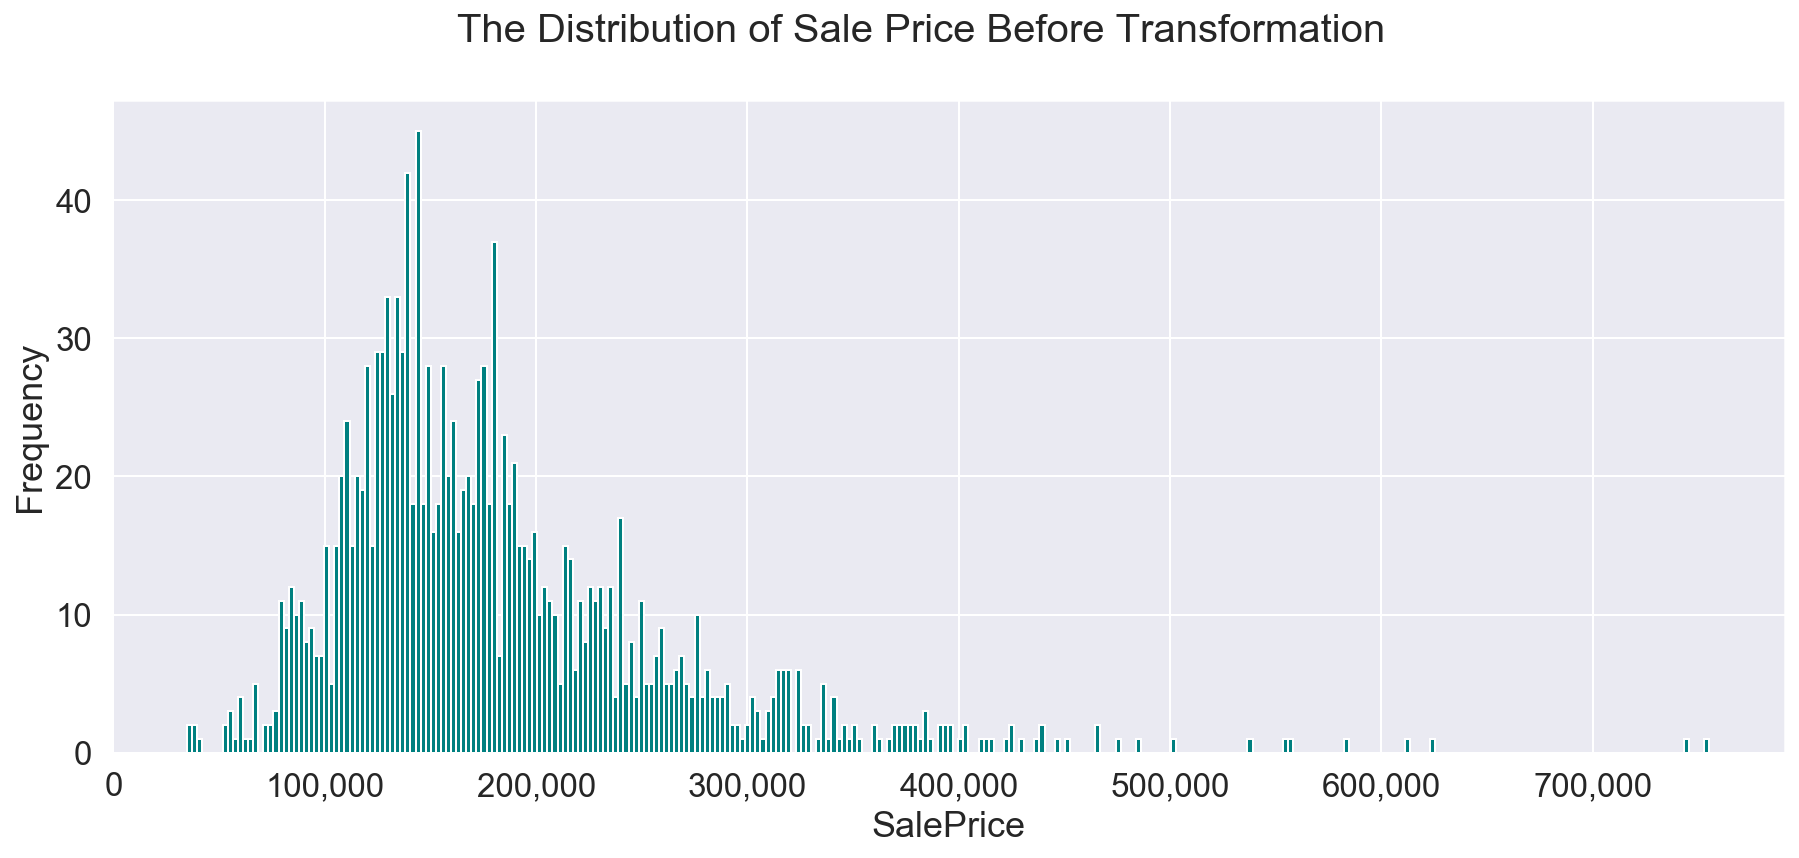

In [29]:
fig, ax = plt.subplots( figsize=(15, 6))
ax.hist(visual_df['SalePrice'], bins = 300, color = color_hist)

ax.set_xlabel('SalePrice')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of Sale Price Before Transformation', fontsize = 20)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

From the graph above it shows that the sales price lies between 100k and 250k. Also, it shows alot of outlires on the right side.

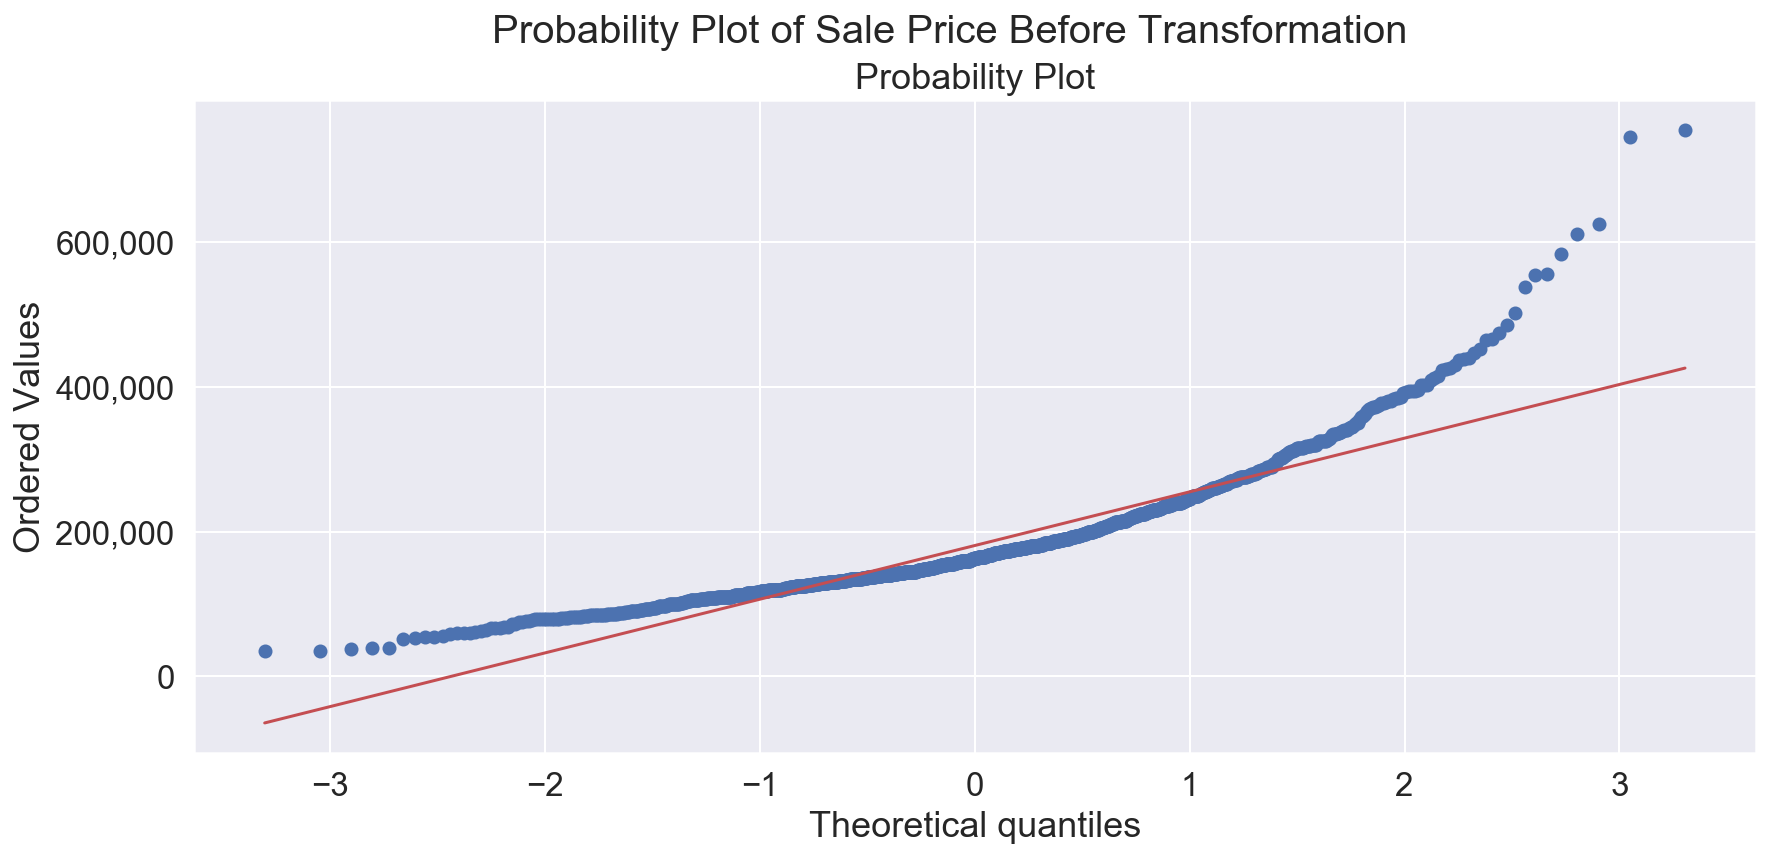

In [30]:
fig, ax = plt.subplots(figsize = (14, 6))
res = stats.probplot(visual_df['SalePrice'], plot = plt)
fig.suptitle('Probability Plot of Sale Price Before Transformation', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

### Applying log transform on the data to making it normally distributed

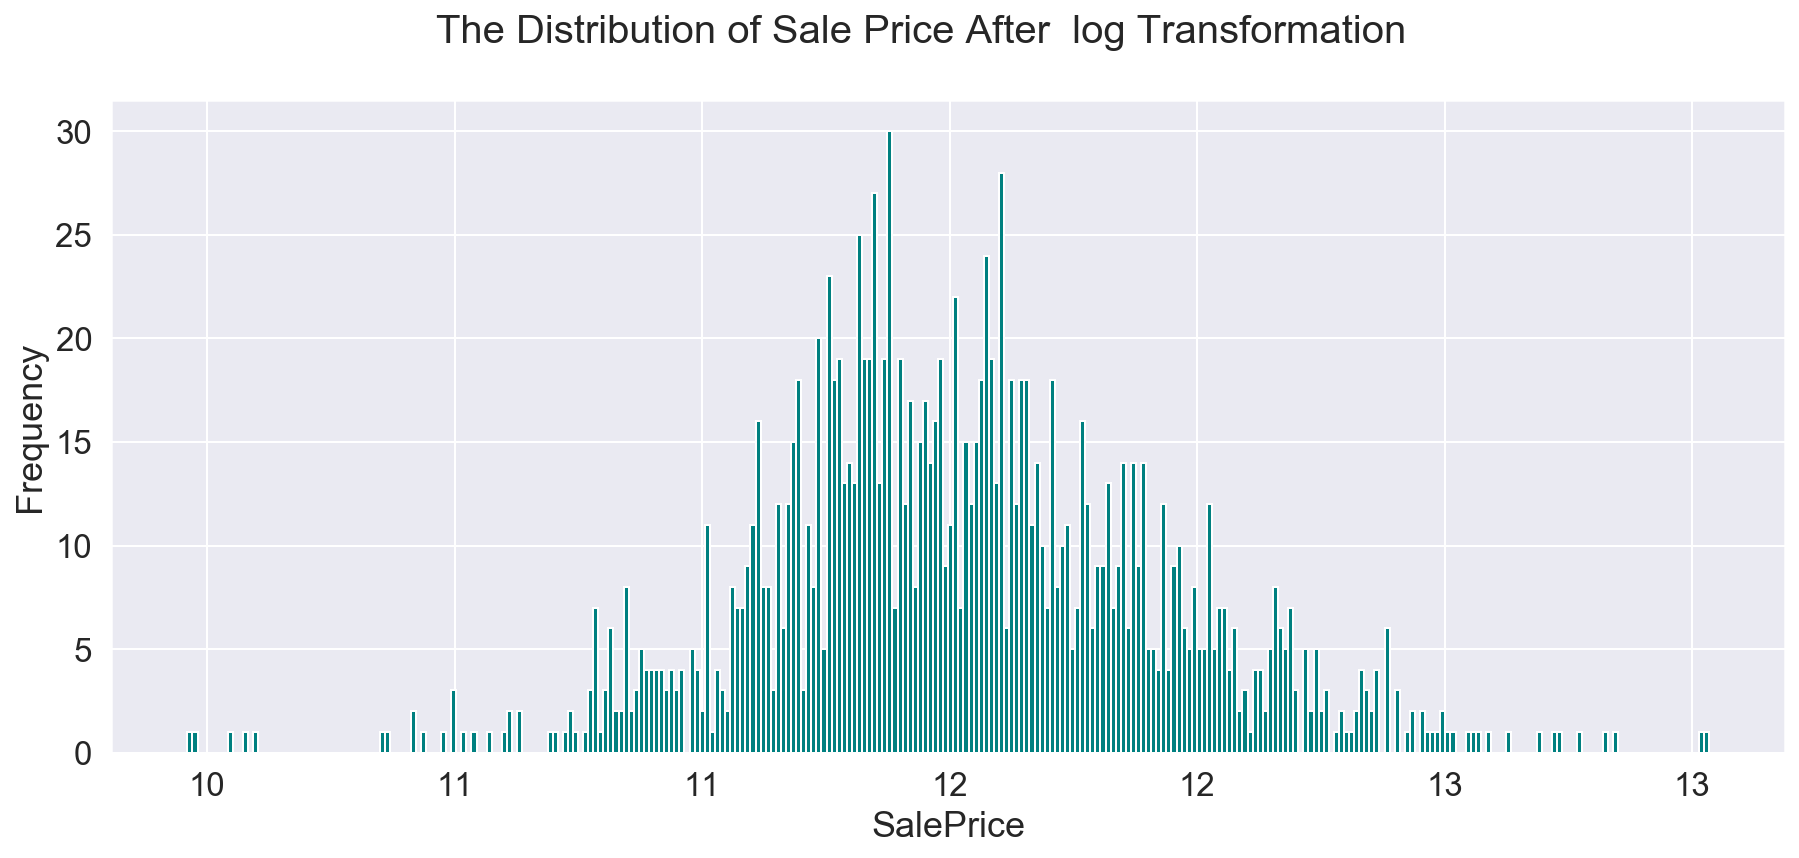

In [31]:
fig, ax = plt.subplots( figsize = (15, 6))
ax.hist(np.log(visual_df['SalePrice']), bins = 300, color = color_hist)

ax.set_xlabel('SalePrice')
ax.set_ylabel('Frequency')

fig.suptitle('The Distribution of Sale Price After  log Transformation', fontsize = 20)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

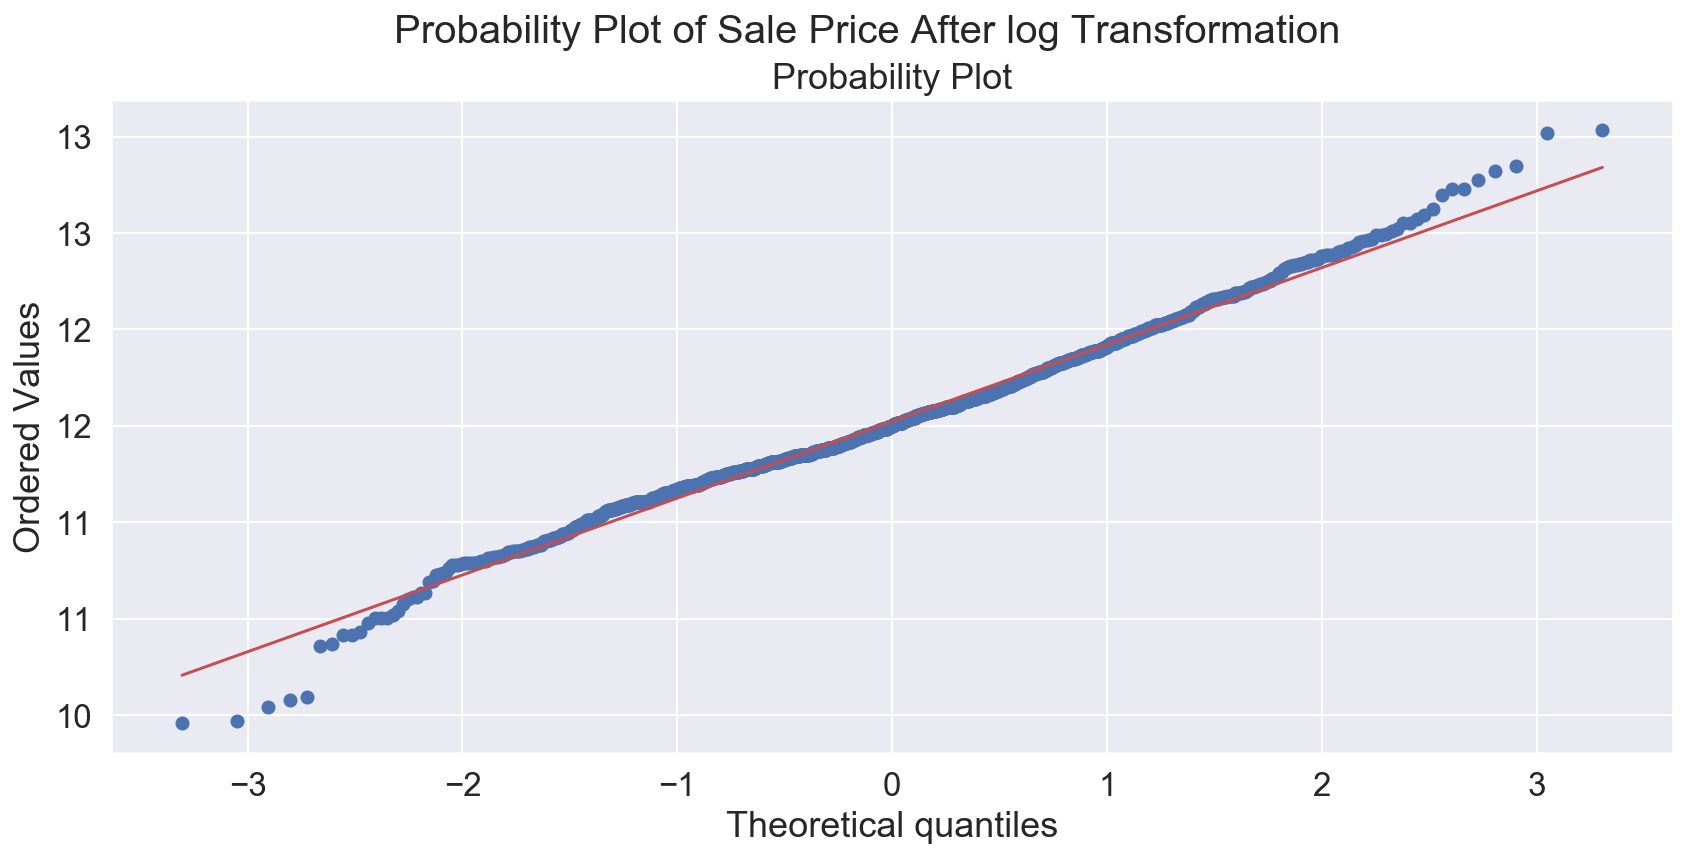

In [32]:
fig, ax = plt.subplots(figsize = (14, 6))
res = stats.probplot(np.log1p(visual_df['SalePrice']), plot = plt)

fig.suptitle('Probability Plot of Sale Price After log Transformation', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

**Why are we thinking about transforming the 'SalePrice' with log**

We can see that the distribution of the target was right-skewed, and we cannot really drop all the outliers that are affecting the distribution. However, after the log, the target became normally distributed, and much better and it will be easier to fit models and to predict correct values. Therefore, we will change the target to log now, and after prediction, we will use exponentiation.

In a very useful article about log in Medium:
> It is useful if and only if the distribution of the target variable is right-skewed, which can be observed by a simple histogram plot. This occurs when there are outliers that can’t be filtered out as they are important to the model.

sourse: (https://medium.com/towards-artificial-intelligence/when-and-why-to-use-log-transformation-in-regression-6a326d6259e6)

In [33]:
# applying log to target
df['SalePrice'] = np.log(df['SalePrice'])

## Detecting for outliers

In [34]:
# getting the columns with the highest corelation with salePrice, and clean them from outliers
high_corr = visual_df.corr()['SalePrice'].sort_values(ascending = False).head(10)
high_corr.index.to_list()

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'BsmtQual']

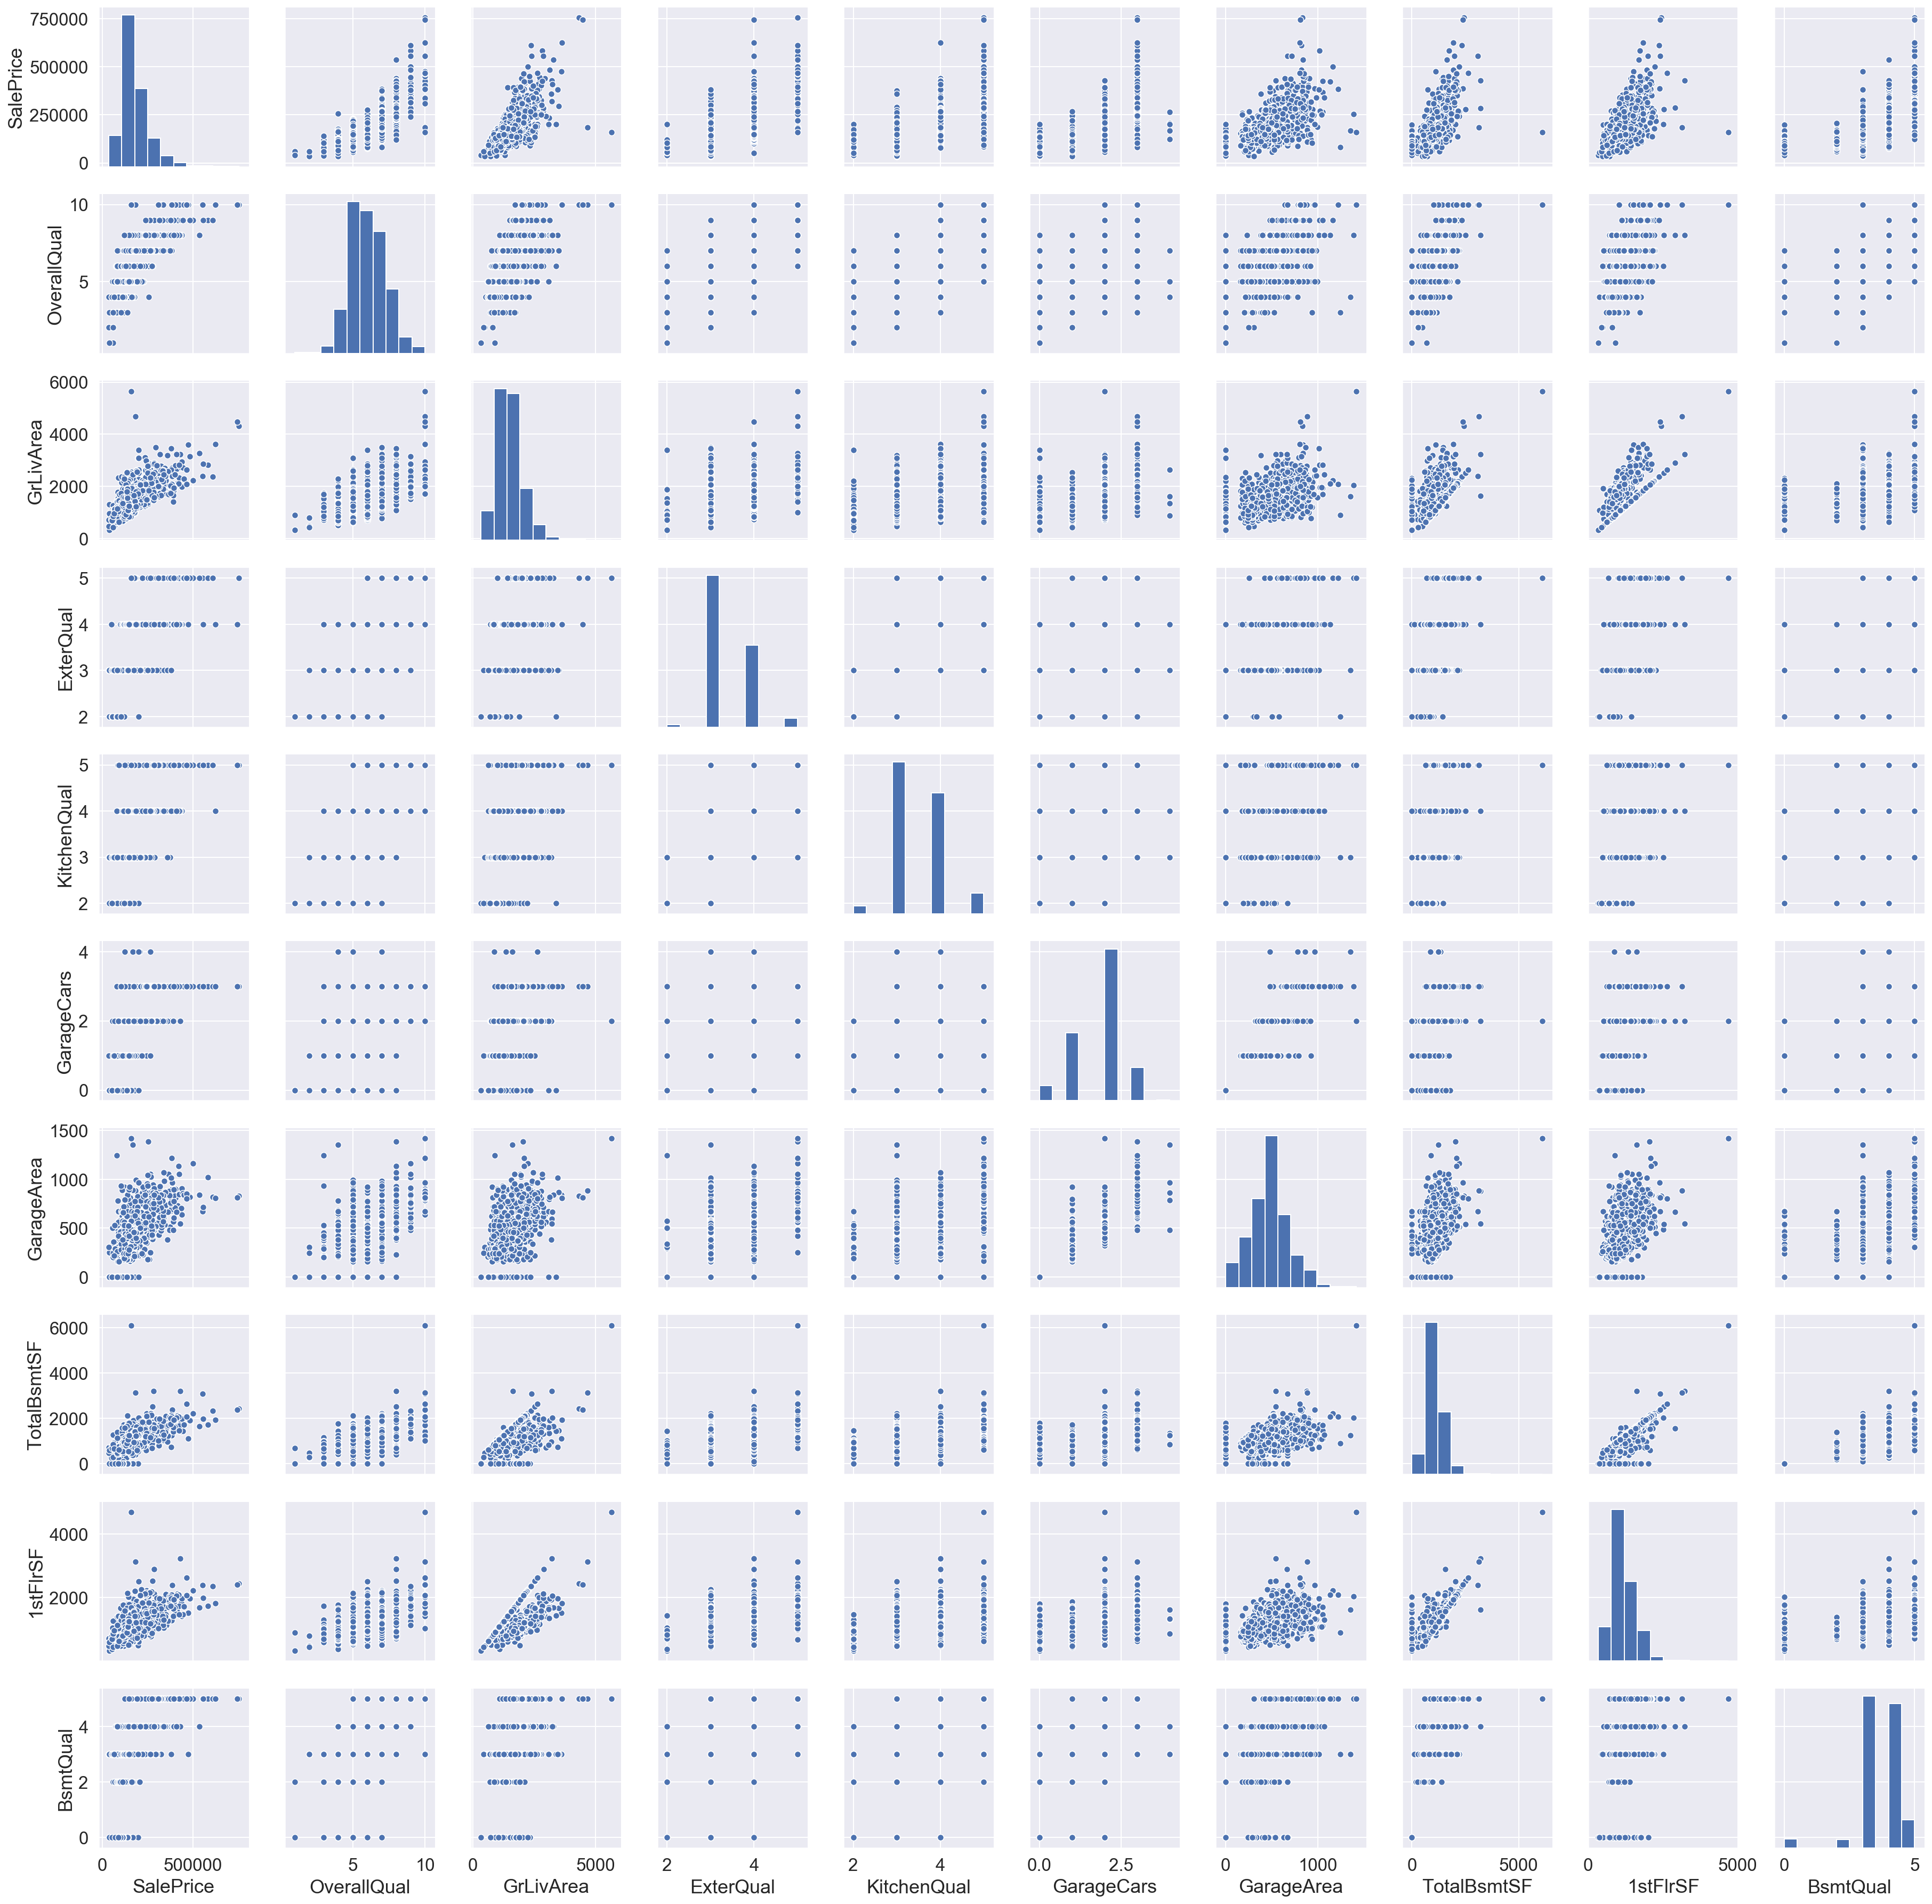

In [35]:
# overview of all plots
sns.pairplot(visual_df[high_corr.index.to_list()])

### Checking Columns with high Correlation with the target individually to visualize distribution and outliers 

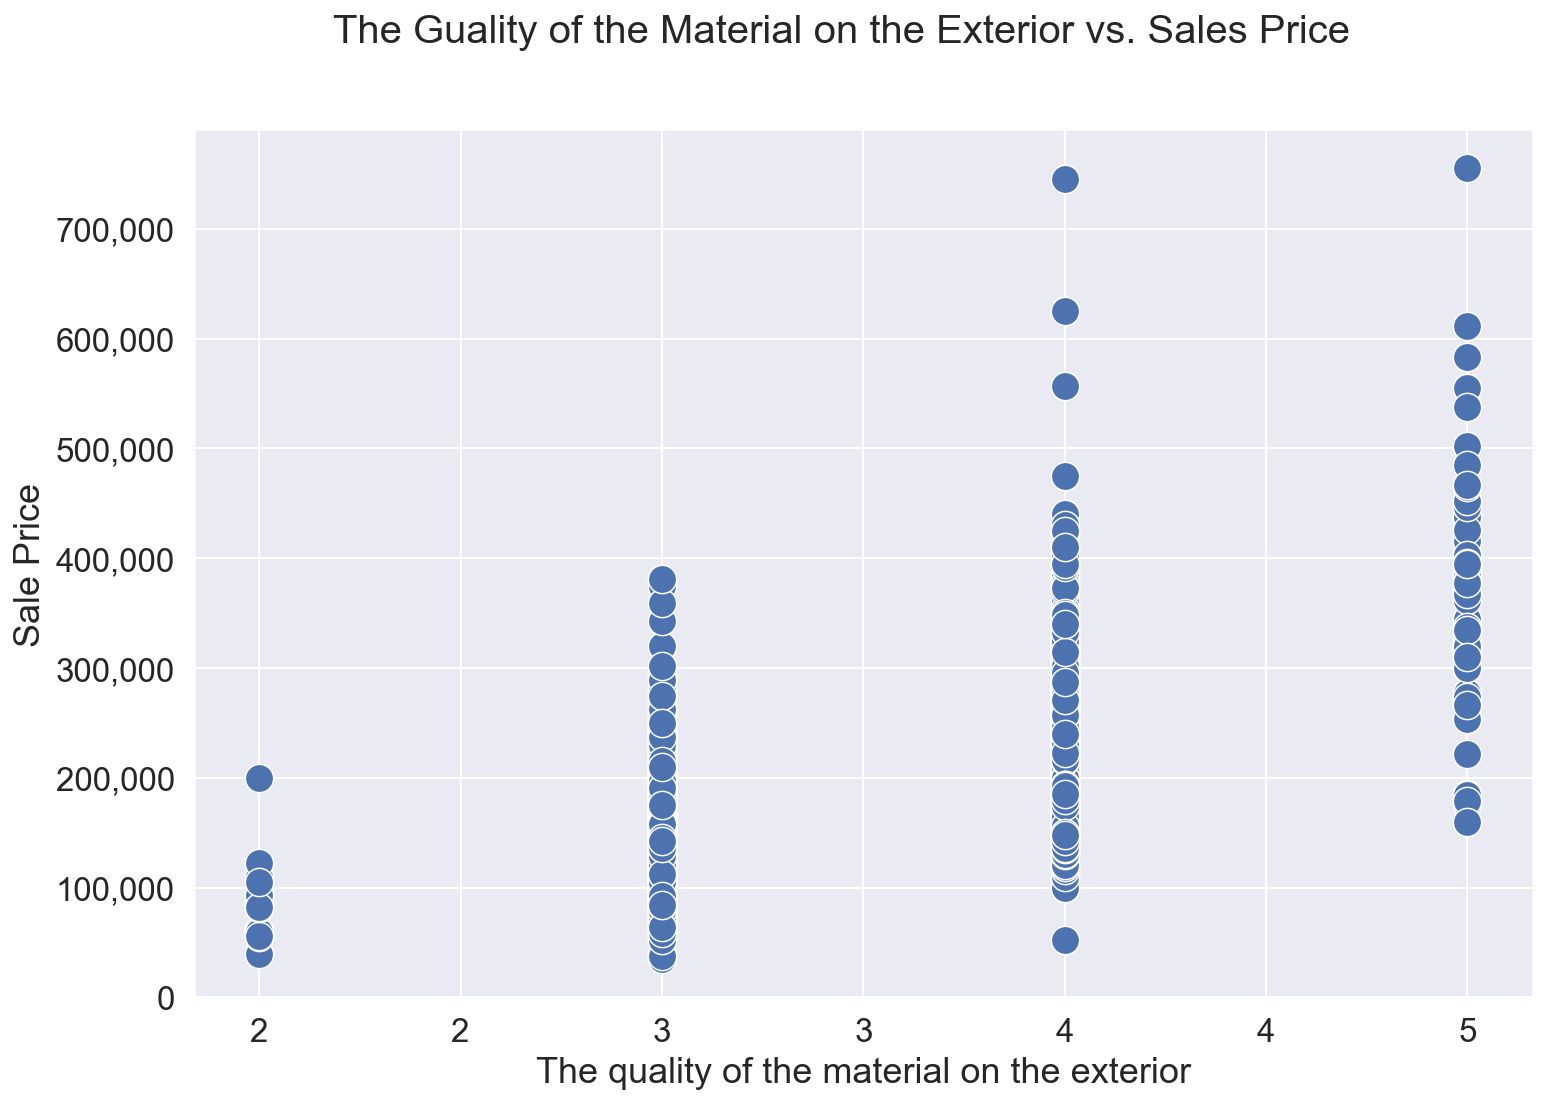

In [36]:
fig, ax = plt.subplots( figsize = (12, 8))
ax = sns.scatterplot(x = 'ExterQual', 
                     y = 'SalePrice', 
                     data = visual_df, 
                     marker = 'o', s = 200, palette = color)

ax.set_ylabel('Sale Price')
ax.set_xlabel('The quality of the material on the exterior')
fig.suptitle('The Guality of the Material on the Exterior vs. Sales Price', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

The distribution is ok, maybe two potential outliers when the price is higher than 700,000

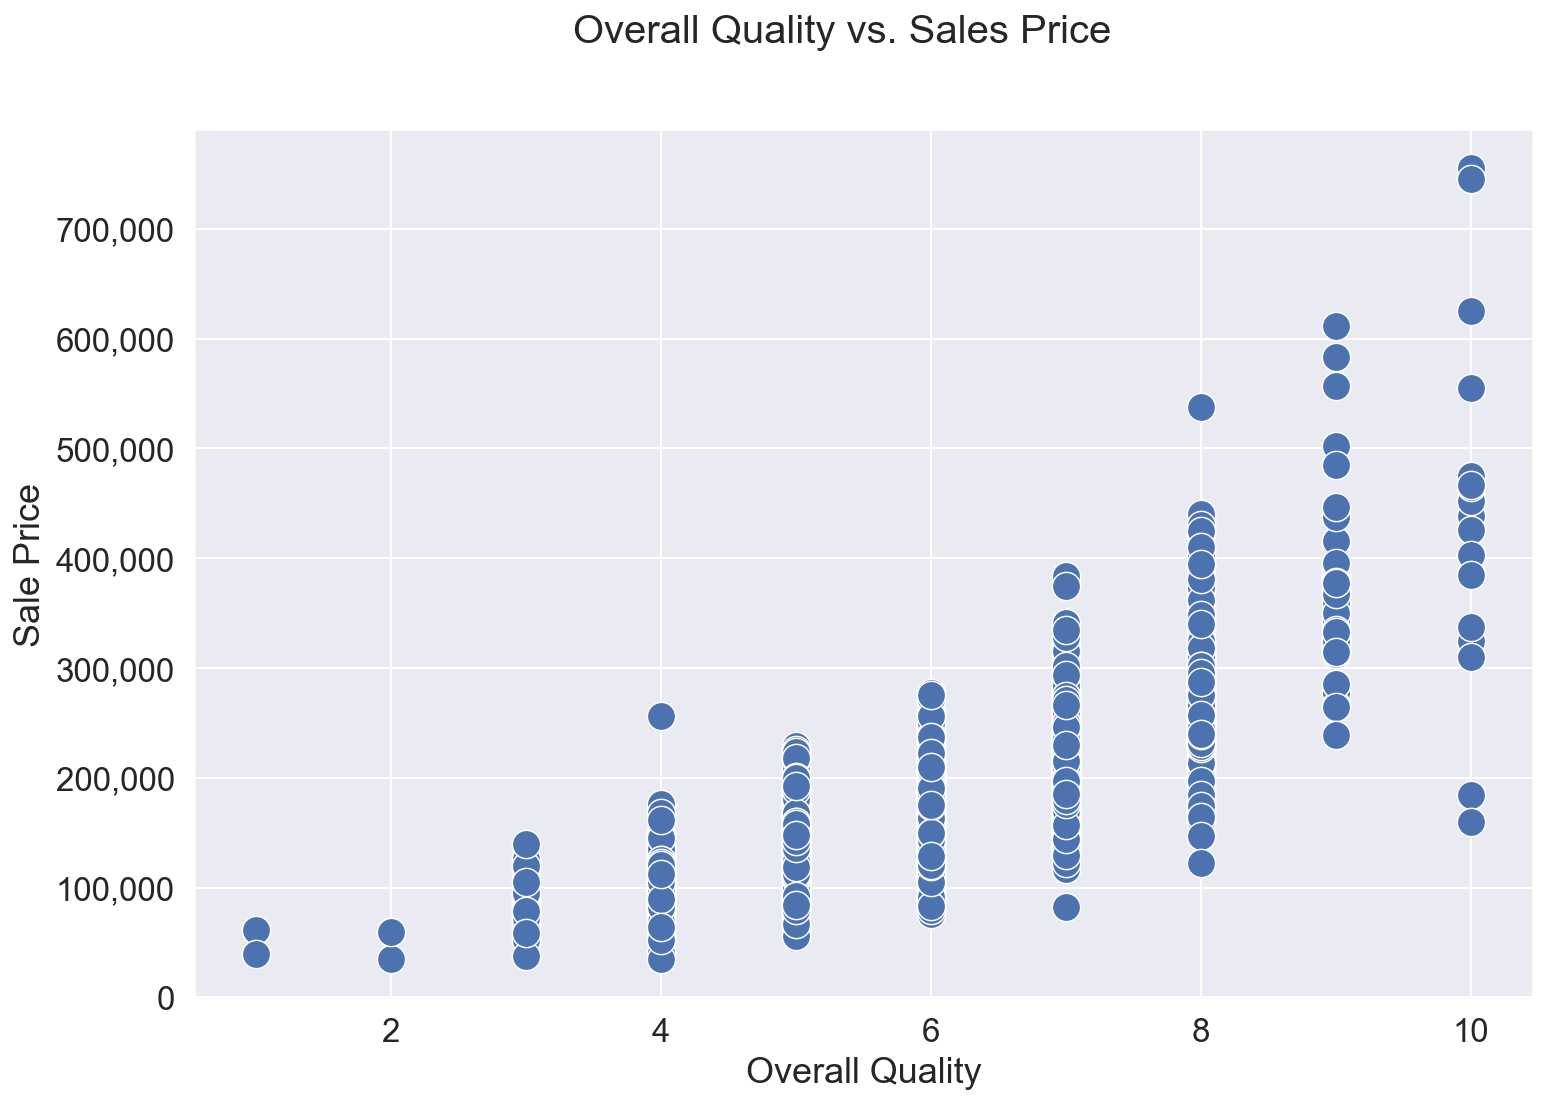

In [37]:
fig, ax = plt.subplots( figsize = (12, 8))
ax = sns.scatterplot(x = 'OverallQual', 
                     y = 'SalePrice', 
                     data = visual_df, 
                     marker = 'o', s = 200, palette = color)

ax.set_ylabel('Sale Price')
ax.set_xlabel('Overall Quality')
fig.suptitle('Overall Quality vs. Sales Price', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

The distribution is ok, maybe two potential outliers when the price is higher than 700,000, same as above.

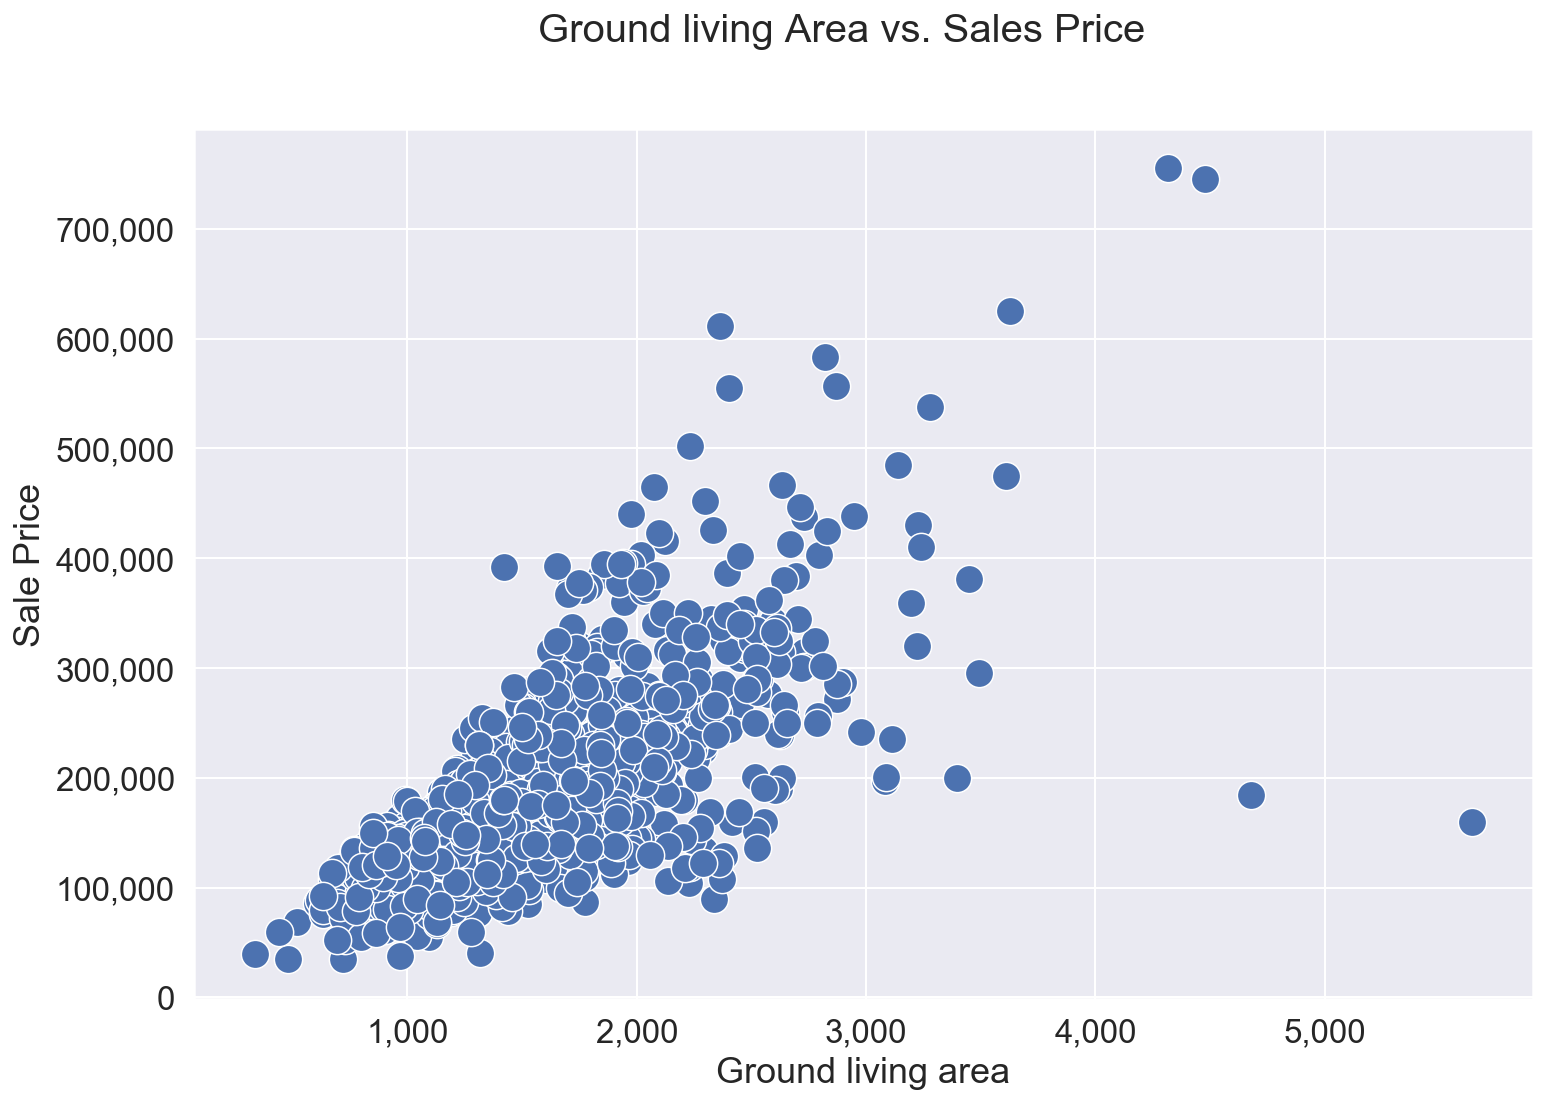

In [38]:
fig, ax = plt.subplots( figsize = (12, 8))
ax = sns.scatterplot(x = 'GrLivArea', 
                     y = 'SalePrice', 
                     data = visual_df, 
                     marker = 'o', s = 200, palette = color)

ax.set_ylabel('Sale Price')
ax.set_xlabel('Ground living area')
fig.suptitle('Ground living Area vs. Sales Price', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

There is a positive correlation between ground living area and sale price, but for sure there are two outliers when the price is lower than 200,000,and ground leving area is higher than 4000. We need to drop these two outliers. 

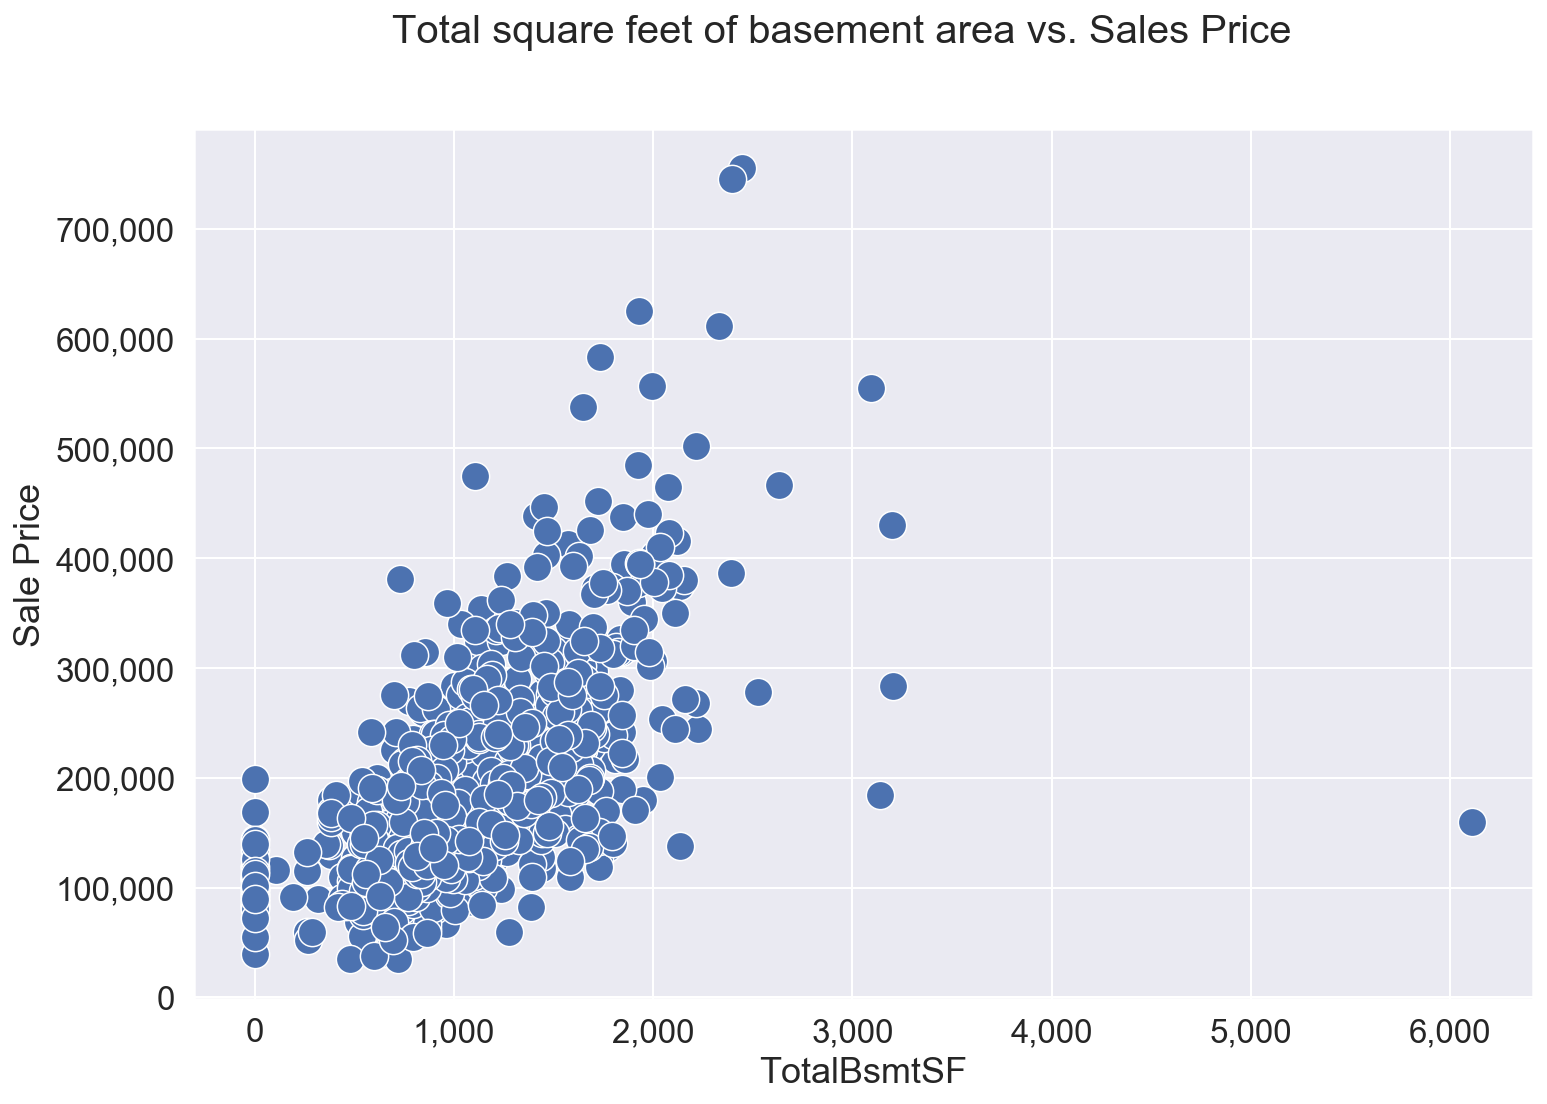

In [39]:
fig, ax = plt.subplots( figsize = (12, 8))
ax = sns.scatterplot(x = 'TotalBsmtSF', 
                     y = 'SalePrice', 
                     data = visual_df, 
                     marker = 'o', s = 200, palette = color)

ax.set_ylabel('Sale Price')
ax.set_xlabel('TotalBsmtSF')
fig.suptitle('Total square feet of basement area vs. Sales Price', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

No need to check outliers in TotalBsmtSF because the multiconriality with 1stFlrSF, so we dropped it. There is one outlier which is TotalBsmtSF is higher than 6000.



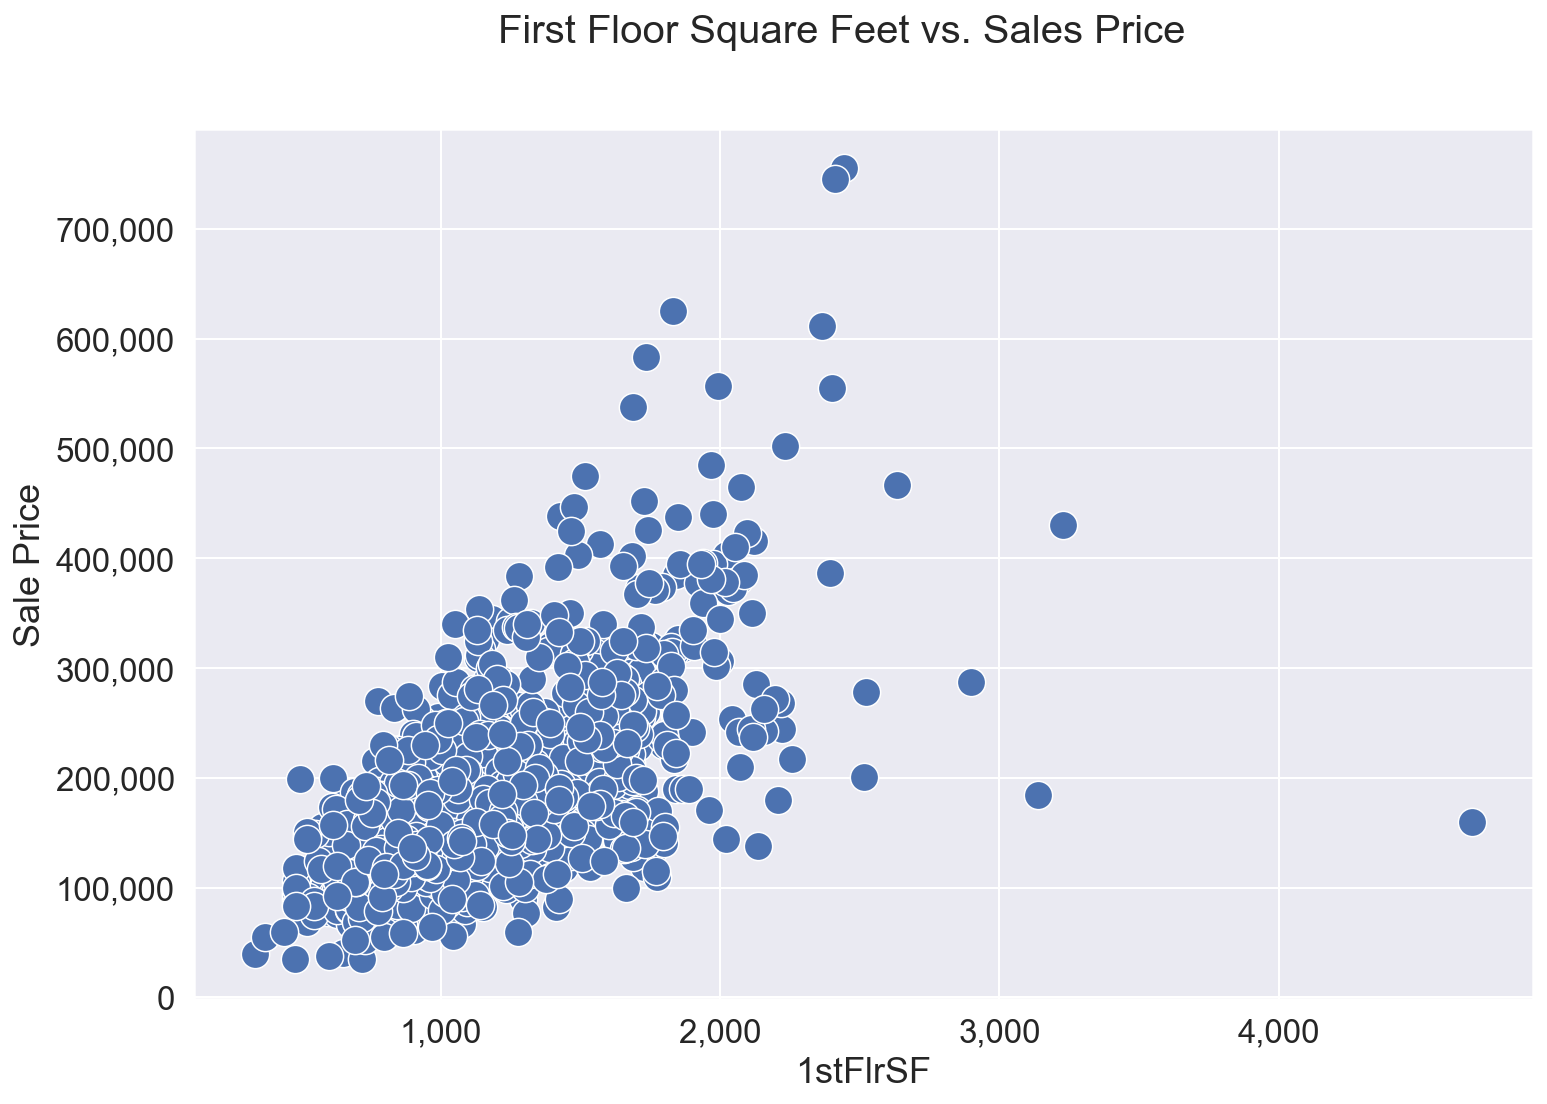

In [40]:
fig, ax = plt.subplots( figsize = (12, 8))
ax = sns.scatterplot(x = '1stFlrSF', 
                     y = 'SalePrice', 
                     data = visual_df, 
                     marker = 'o', s = 200, palette = color)

ax.set_ylabel('Sale Price')
ax.set_xlabel('1stFlrSF')
fig.suptitle('First Floor Square Feet vs. Sales Price', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

There is one outlier that we will drop, which is when 1stFlrSF is higher than 4000

In [41]:
cat_visual_df = visual_df[visual_df.select_dtypes('object').columns]
cat_visual_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtFinType2',
       'Heating', 'Electrical', 'Functional', 'GarageType', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

#### 8. Create a data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|Id|int|df|Id of the house|
|MSSubClass|int|df|Identifies the type of dwelling involved in the sale|
|MSZoning|object|df|Identifies the general zoning classification of the sale|
|LotFrontage|float|df|Linear feet of street connected to property|
|LotArea|int|df|Lot size in square feet|
|Street|object|df|Type of road access to property| 
|Alley|object|df|Type of alley access to property| 
|LotShape|object|df|General shape of property|
|LandContour|object|df|Flatness of the property|
|Utilities|object|df|Type of utilities available|
|LotConfig|object|df|Lot configuration|
|LandSlope|object|df|Slope of property|
|Neighborhood|object|df|Physical locations within Ames city limits|
|Condition1|object|df|Proximity to various conditions|
|Condition2|object|df|Proximity to various conditions (if more than one is present)|
|BldgType|object|df|Type of dwelling|
|HouseStyle|object|df|Style of dwelling|
|OverallQual|int|df|Rates the overall material and finish of the house|
|OverallCond|int|df|Rates the overall condition of the house|
|YearBuilt|int|df|Original construction date|
|YearRemodAdd|int|df|Remodel date (same as construction date if no remodeling or additions)|
|RoofStyle|object|df|Type of roof|
|RoofMatl|object|df|Roof material|
|Exterior1st|object|df|Exterior covering on house|
|Exterior2nd|object|df|Exterior covering on house (if more than one material)| 
|MasVnrType|object|df|Masonry veneer type|
|MasVnrArea|float|df|Masonry veneer area in square feet|
|ExterQual|object|df|Evaluates the quality of the material on the exterior|
|ExterCond|object|df|Evaluates the present condition of the material on the exterior|
|Foundation|object|df|Type of foundation|
|BsmtQual|object|df|Evaluates the height of the basement|
|BsmtCond|object|df|Evaluates the general condition of the basement|
|BsmtExposure|object|df|Refers to walkout or garden level walls|
|BsmtFinType1|object|df|Rating of basement finished area|
|BsmtFinSF1|int|df|Type 1 finished square feet|
|BsmtFinType2|object|df|Rating of basement finished area (if multiple types)|
|BsmtFinSF2|int|df|Type 2 finished square feet|
|BsmtUnfSF|int|df|Unfinished square feet of basement area|
|TotalBsmtSF|int|df|Total square feet of basement area|
|Heating|object|df|Type of heating|
|HeatingQC|object|df|Heating quality and condition|
|CentralAir|object|df|Central air conditioning|
|Electrical|object|df|Electrical system|
|1stFlrSF|int|df|First Floor square feet|
|2ndFlrSF|int|df|Second floor square feet|
|LowQualFinSF|int|df|Low quality finished square feet (all floors)|
|GrLivArea|int|df|Above grade (ground) living area square feet|
|BsmtFullBath|int|df|Basement full bathrooms|
|BsmtHalfBath|int|df|Basement half bathrooms|
|FullBath|int|df|Full bathrooms above grade|
|HalfBath|int|df|Half baths above grade|
|BedroomAbvGr|int|df|Bedrooms above grade (does NOT include basement bedrooms)|
|KitchenAbvGr|int|df|Kitchens above grade|
|KitchenQual|object|df|Kitchen quality|
|TotRmsAbvGrd|int|df|Total rooms above grade (does not include bathrooms)|
|Functional|object|df|Home functionality (Assume typical unless deductions are warranted)|
|Fireplaces|int|df|Number of fireplaces|
|FireplaceQu|object|df|Fireplace quality|
|GarageType|object|df|Garage location|
|GarageYrBlt|float|df|Year garage was built|
|GarageFinish|object|df|Interior finish of the garage|
|GarageCars|int|df|Size of garage in car capacity|
|GarageArea|int|df|Size of garage in square feet|
|GarageQual|object|df|Garage quality|
|GarageCond|object|df|Garage condition|
|PavedDrive|object|df|Paved driveway|
|WoodDeckSF|int|df|Wood deck area in square feet|
|OpenPorchSF|int|df|Open porch area in square feet|
|EnclosedPorch|int|df|Enclosed porch area in square feet|
|3SsnPorch|int|df|Three season porch area in square feet|
|ScreenPorch|int|df|Screen porch area in square feet|
|PoolArea|int|df|Pool area in square feet|
|PoolQC|object|df|Pool quality|
|Fence|object|df|Fence quality|
|MiscFeature|object|df|Miscellaneous feature not covered in other categories|
|MiscVal|int|df|$Value of miscellaneous feature|
|MoSold|int|df|Month Sold (MM)|
|YrSold|int|df|Year Sold (YYYY)|
|SaleType|object|df|Type of sale|
|SaleCondition|object|df|Condition of sale|

## Finding correlation between columns and visualize it

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

In [42]:
# find corelations between all columns and the target
df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
ExterQual        0.678840
KitchenQual      0.667893
GarageArea       0.650888
BsmtQual         0.615804
TotalBsmtSF      0.612134
GarageFinish     0.604878
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
GarageYrBlt      0.568696
YearRemodAdd     0.565608
FireplaceQu      0.546362
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
HeatingQC        0.473762
MasVnrArea       0.426775
BsmtFinSF1       0.372023
GarageQual       0.363259
BsmtExposure     0.357421
GarageCond       0.356767
CentralAir       0.351600
BsmtFinType1     0.334803
LotFrontage      0.334366
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
PavedDrive       0.305235
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold      

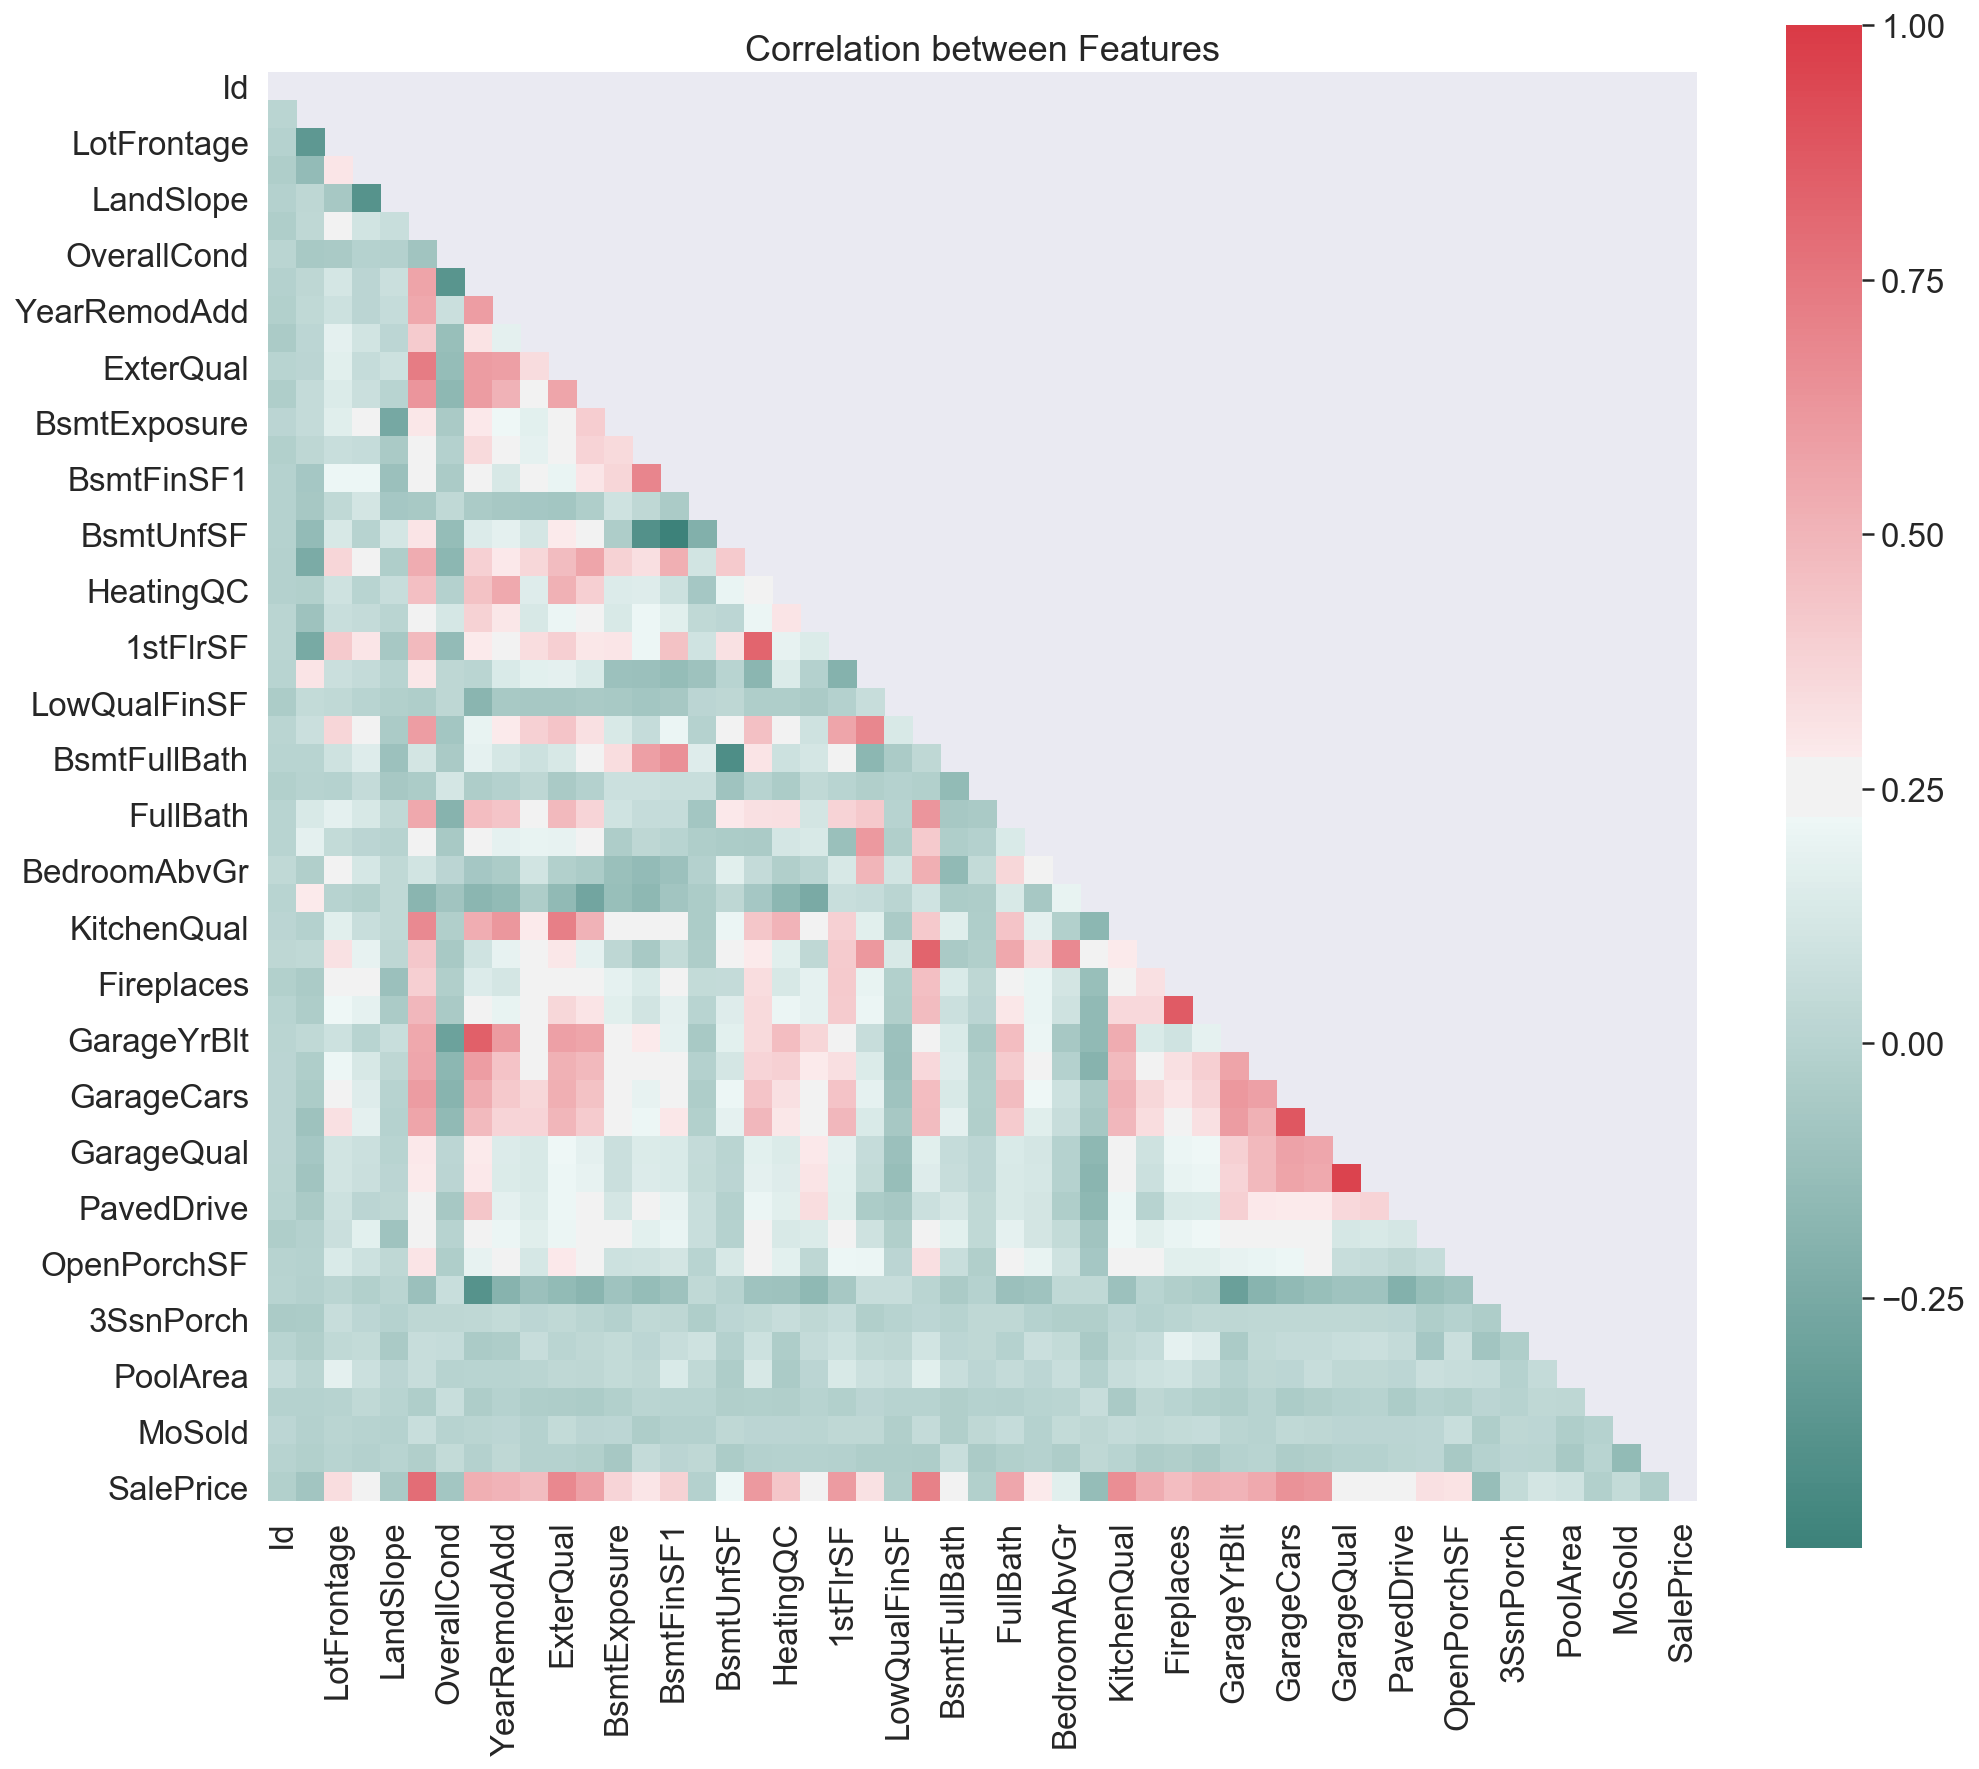

In [43]:
fig, axs = plt.subplots(figsize = (16, 14)) 
mask = np.triu(np.ones_like(visual_df.corr(), dtype = np.bool))
g = sns.heatmap(visual_df.corr(), ax = axs, mask=mask, cmap = sns.diverging_palette(180, 10, as_cmap = True), square = True)

plt.title('Correlation between Features')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

From the heatmap above, we can see that there are several features highly correlated, and these will cause multicollinearity. We need to drop one of them.

- YearBuilt and GarageYrBlt, this is reasonable since many times YearBuilt and GarageYrBlt will be the same. Drop GarageYrBlt
- GrLivArea and TotRmsAbvGrd, drop TotRmsAbvGrd
- 1stFlrSF and TotalBsmtSF, drop TotalBsmtSF
- GarageCars & GarageArea, tried to drop GarageCars, but preformance got worst. Therefor, keeping both.

In [44]:
df = df.drop(['GarageYrBlt', 'TotRmsAbvGrd', 'TotalBsmtSF'], axis = 1)

## Visualizing only coulmns with high correlation with the target

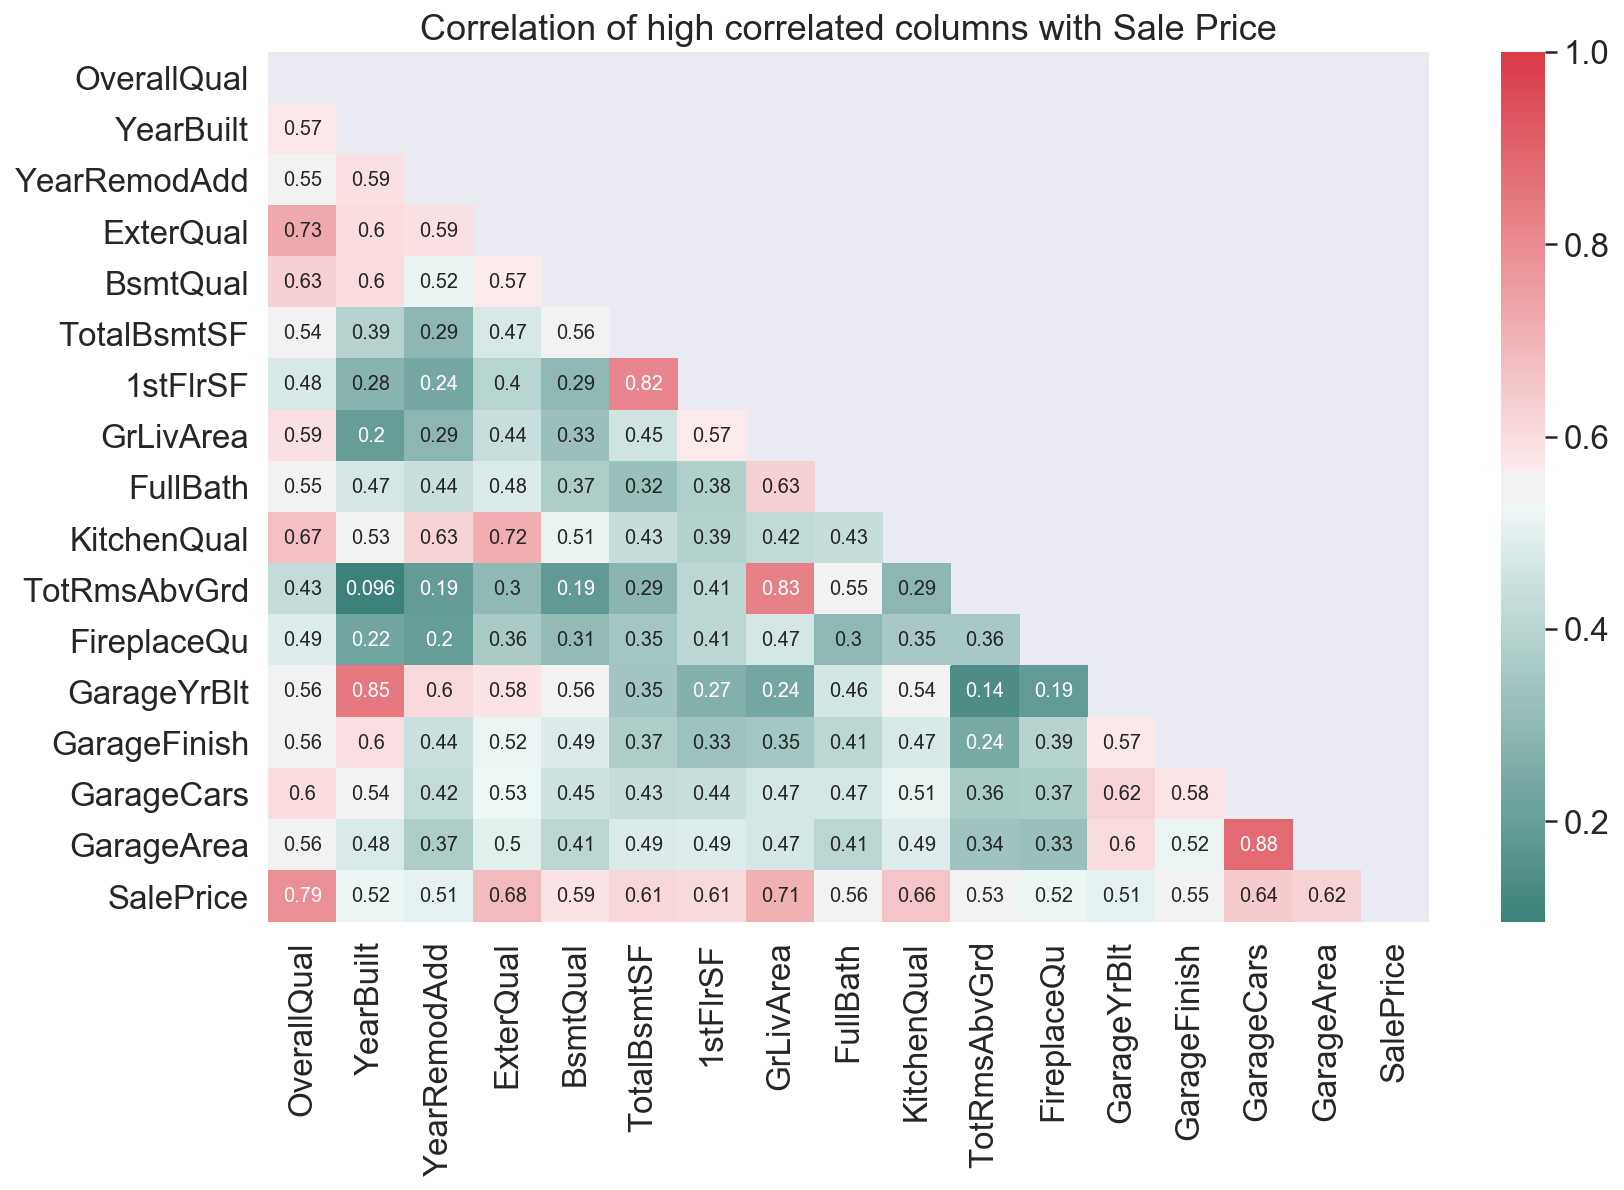

In [45]:
corr_matrix = visual_df.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix['SalePrice']) > 0.5]

fig, axs = plt.subplots(figsize = (13, 8)) 
mask = np.triu(np.ones_like(visual_df[top_corr_features].corr(), dtype = np.bool))
sns.heatmap(visual_df[top_corr_features].corr(), ax = axs, annot = True, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Correlation of high correlated columns with Sale Price')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

## The distribution of Numerical Columns in the Dataframe

In [46]:
# a function that takes a dataframe and transforms it into a standard form after dropping nun_numirical columns
def to_standard (df):
    
    num_df = df[df.select_dtypes(include = np.number).columns.tolist()]
    
    ss = StandardScaler()
    std = ss.fit_transform(num_df)
    
    std_df = pd.DataFrame(std, index = num_df.index, columns = num_df.columns)
    return std_df

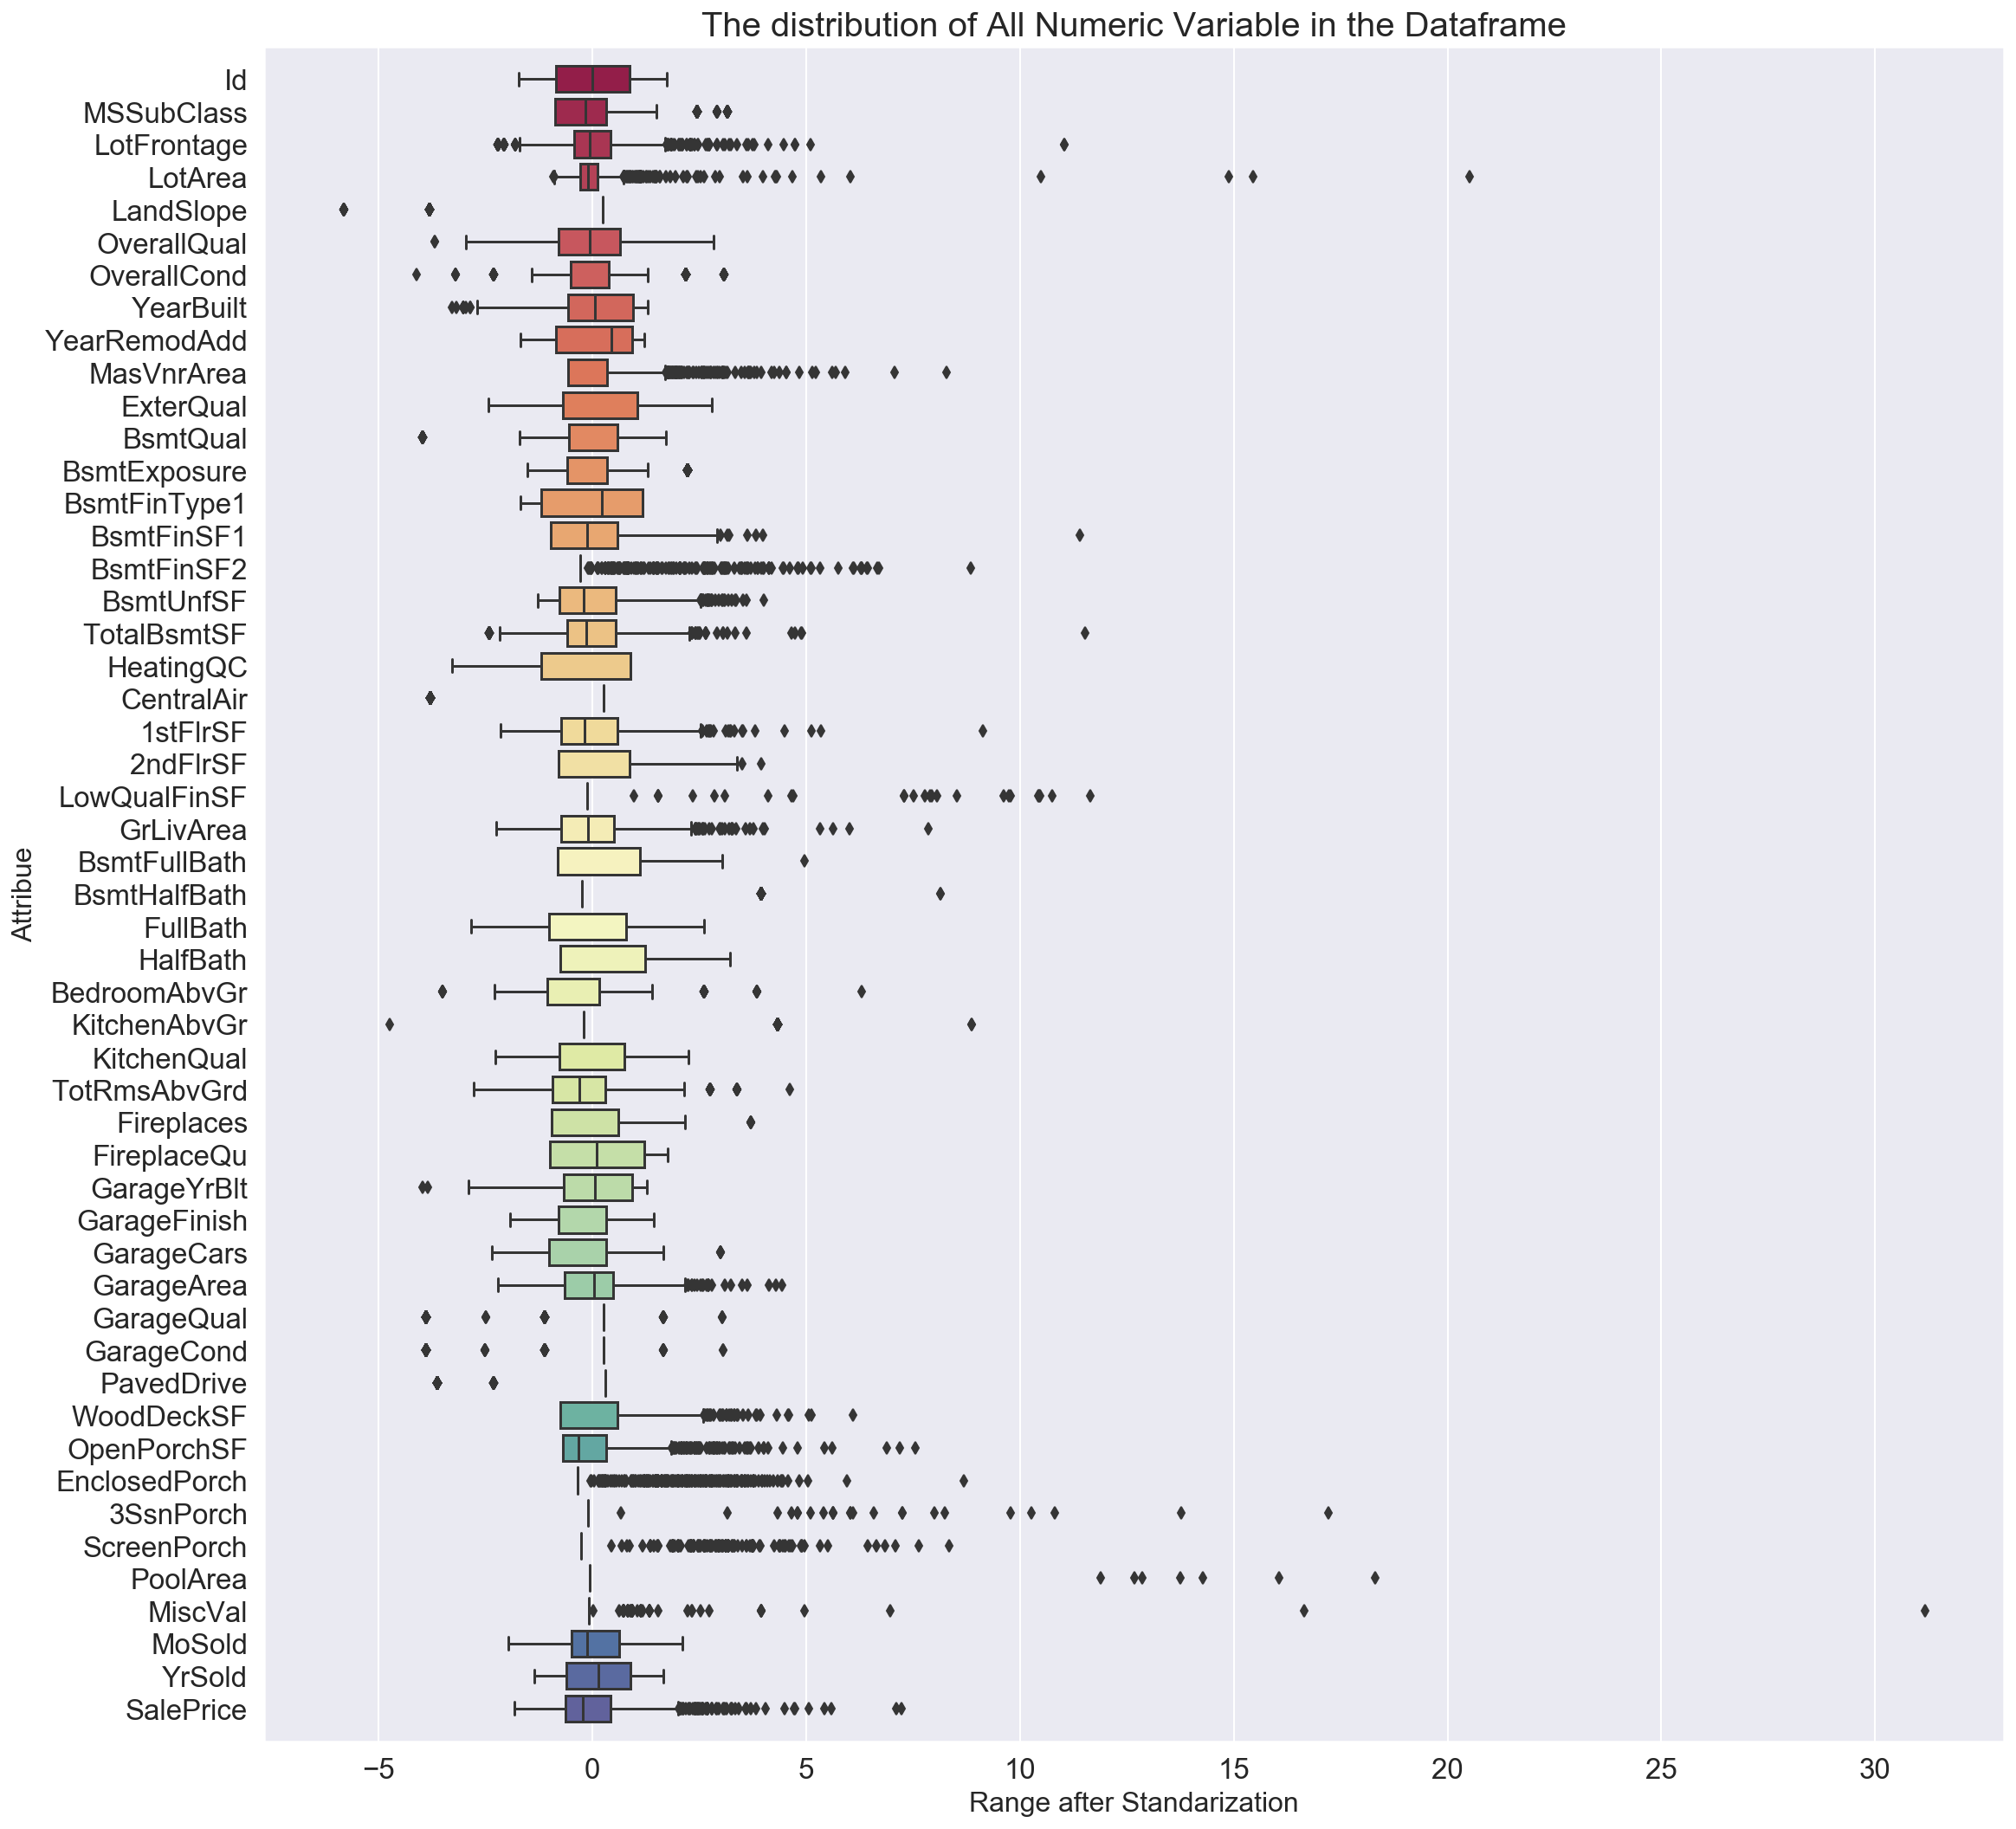

In [47]:
ax, fig = plt.subplots(1, 1, figsize = (18, 18))
plt.title('The distribution of All Numeric Variable in the Dataframe', fontsize = 20) #Change please

sns.boxplot(y = "variable", x = "value", data = pd.melt(to_standard(visual_df)), palette = color)
plt.xlabel('Range after Standarization', size = 16)
plt.ylabel('Attribue', size = 16)


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

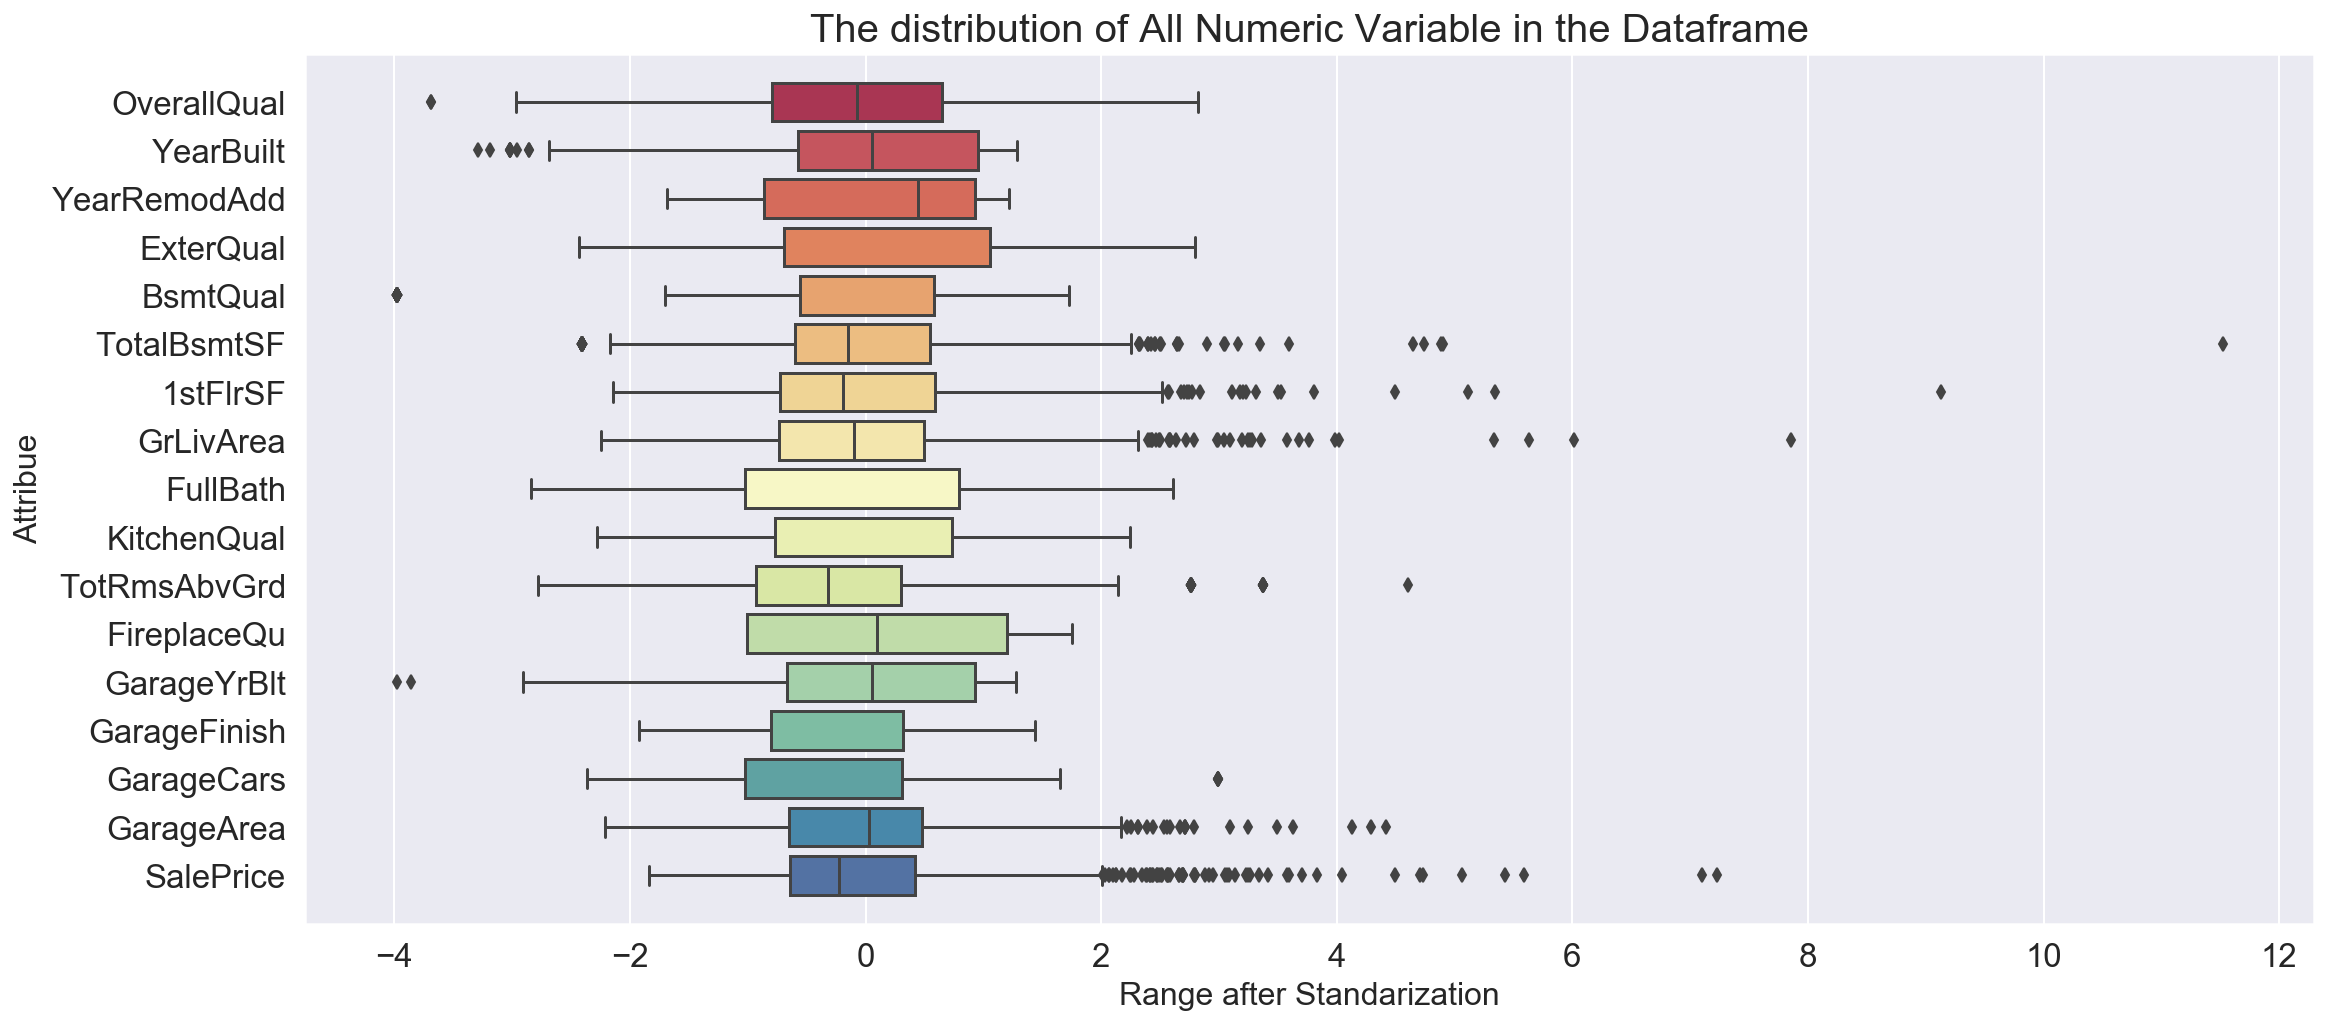

In [48]:
ax, fig = plt.subplots(1, 1, figsize = (18, 8))
plt.title('The distribution of All Numeric Variable in the Dataframe', fontsize = 20) #Change please

sns.boxplot(y = "variable", x = "value", data = pd.melt(to_standard(visual_df[top_corr_features])), palette = color)
plt.xlabel('Range after Standarization', size = 16)
plt.ylabel('Attribue', size = 16)


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

## Checking skewness of all numerical columns

### Workflow Steps:
1. Building and testing models without any transformation, good enough results, but not the best
2. Applying the Box Cox transformation to all columns, got better results
3. Tried to reduce the number of coulmns being transformed by only choosing the columns with high skewness (>4.00), we got even better results.
4. As a final step, we also transformed the columns that have high correlation with the target and have have some skewness, we got the best results. 

### Note
We actually applied this transformation method after building and testing the model, the RMSE score improved drastically after the Box Cox transformation of some columns.
> A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

Sourse: (https://www.statisticshowto.datasciencecentral.com/box-cox-transformation/)

In [49]:
numeric_feats = visual_df.dtypes[visual_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = visual_df[numeric_feats.tolist()].apply(lambda x:stats.skew(x.dropna())).sort_values(ascending = False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew':skewed_feats})
skewness.head()



Skew in numerical features: 



Skew
MiscVal       24.451640
PoolArea      14.813135
LotArea       12.195142
3SsnPorch     10.293752
LowQualFinSF   9.002080

In [50]:
skewed_features =['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF', 
                  'KitchenAbvGr','BsmtFinSF2', 'ScreenPorch', 'GrLivArea', 'ExterQual',
                  'BsmtHalfBath']

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


#skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox(df[feat], lam)

There are 51 skewed numerical features to Box Cox transform


## Getting dummies for all categorical columns 

In [51]:
# changing all Categorical columns to dummies (0,1)
df = pd.get_dummies(df, columns = df.select_dtypes('object').columns, drop_first = True)

In [52]:
# split data from from test_first_id to the end to be in the test
test_df = df.iloc[df[df['Id'] == test_first_id].index[0]:, :]
test_df.head()

Id  MSSubClass  LotFrontage    LotArea  LandSlope  OverallQual  \
1460  1461          20         80.0  20.479022          3            5   
1461  1462          20         81.0  21.326926          3            6   
1462  1463          60         74.0  21.196602          3            5   
1463  1464          60         78.0  19.865045          3            6   
1464  1465         120         43.0  17.256538          3            8   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  \
1460            6       1961          1961         0.0   1.194318         3   
1461            6       1958          1958       108.0   1.194318         3   
1462            5       1997          1998         0.0   1.194318         4   
1463            6       1998          1998        20.0   1.194318         3   
1464            5       1992          1992         0.0   1.540963         4   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1460             1             3       468.0    7.382906      270.0   
1461             1             5       923.0   -6.666667      406.0   
1462             1             6       791.0   -6.666667      137.0   
1463             1             6       602.0   -6.666667      324.0   
1464             1             5       263.0   -6.666667     1017.0   

      HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
1460          3           1       896         0     -6.666667  11.815588   
1461          3           1      1329         0     -6.666667  12.941523   
1462          4           1       928       701     -6.666667  13.549411   
1463          5           1       926       678     -6.666667  13.502567   
1464          5           1      1280         0     -6.666667  12.831341   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1460           0.0     -6.666667         1         0             2   
1461           0.0     -6.666667         1         1             3   
1462           0.0     -6.666667         2         1             3   
1463           0.0     -6.666667         2         1             3   
1464           0.0     -6.666667         2         0             2   

      KitchenAbvGr  KitchenQual  Fireplaces  FireplaceQu  GarageFinish  \
1460           0.0            3           0            0             1   
1461           0.0            4           0            0             1   
1462           0.0            3           1            3             3   
1463           0.0            4           1            4             3   
1464           0.0            4           0            0             2   

      GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
1460         1.0       730.0           3           3           3         140   
1461         1.0       312.0           3           3           3         393   
1462         2.0       482.0           3           3           3         212   
1463         2.0       470.0           3           3           3         360   
1464         2.0       506.0           3           3           3           0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea    MiscVal  \
1460            0              0  -6.666667     7.003881 -6.666667  -6.666667   
1461           36              0  -6.666667    -6.666667 -6.666667  20.777196   
1462           34              0  -6.666667    -6.666667 -6.666667  -6.666667   
1463           36              0  -6.666667    -6.666667 -6.666667  -6.666667   
1464           82              0  -6.666667     7.382906 -6.666667  -6.666667   

      MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
1460       6    2010       -inf            0            1            0   
1461       6    2010       -inf            0            0            1   
1462       3    2010       -inf            0            0            1   
1463       6    2010       -inf            0            0            1   


In [53]:
# deleting the test dataset from the main df
df = df.iloc[0:(df[df['Id'] == test_first_id].index[0]), :]
df.tail()

Id  MSSubClass  LotFrontage    LotArea  LandSlope  OverallQual  \
1455  1456          60         62.0  18.960042          3            6   
1456  1457          20         85.0  20.994554          3            6   
1457  1458          70         66.0  19.475912          3            7   
1458  1459          20         68.0  19.759768          3            5   
1459  1460          20         75.0  19.848663          3            5   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  \
1455            5       1999          2000         0.0   1.194318         4   
1456            6       1978          1988       119.0   1.194318         4   
1457            9       1941          2006         0.0   1.820334         3   
1458            6       1950          1996         0.0   1.194318         3   
1459            6       1965          1965         0.0   1.540963         3   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1455             1             1         0.0   -6.666667      953.0   
1456             1             5       790.0    7.646538      589.0   
1457             1             6       275.0   -6.666667      877.0   
1458             2             6        49.0   12.203296        0.0   
1459             1             4       830.0    8.938501      136.0   

      HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
1455          5           1       953       694     -6.666667  13.582762   
1456          3           1      2073         0     -6.666667  14.293688   
1457          5           1      1188      1152     -6.666667  14.678086   
1458          4           1      1078         0     -6.666667  12.335431   
1459          4           1      1256         0     -6.666667  12.776061   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1455           0.0     -6.666667         2         1             3   
1456           1.0     -6.666667         2         0             3   
1457           0.0     -6.666667         2         0             4   
1458           1.0     -6.666667         1         0             2   
1459           1.0     -6.666667         1         1             3   

      KitchenAbvGr  KitchenQual  Fireplaces  FireplaceQu  GarageFinish  \
1455           0.0            3           1            3             2   
1456           0.0            3           2            3             1   
1457           0.0            4           2            4             2   
1458           0.0            4           0            0             1   
1459           0.0            3           0            0             3   

      GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
1455         2.0       460.0           3           3           3           0   
1456         2.0       500.0           3           3           3         349   
1457         1.0       252.0           3           3           3           0   
1458         1.0       240.0           3           3           3         366   
1459         1.0       276.0           3           3           3         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea    MiscVal  \
1455           40              0  -6.666667    -6.666667 -6.666667  -6.666667   
1456            0              0  -6.666667    -6.666667 -6.666667  -6.666667   
1457           60              0  -6.666667    -6.666667 -6.666667  14.890900   
1458            0            112  -6.666667    -6.666667 -6.666667  -6.666667   
1459           68              0  -6.666667    -6.666667 -6.666667  -6.666667   

      MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
1455       8    2007  12.072541            0            0            1   
1456       2    2010  12.254863            0            0            1   
1457       5    2010  12.493130            0            0            1   
1458       4    2010  11.864462            0            0            1   


## Outlier removal

In [54]:
# removing GrLivArea outliers, also dropping SalePrice > 700,000 by default, which is good.
print(df.shape)
df.drop(df.index[[523, 1298]], inplace = True)
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)].index)
df = df.drop(df[df['1stFlrSF'] >= 3000].index)
print(df.shape)

(1460, 225)
(1457, 225)


In [55]:
#No need for the ID column
df = df.drop('Id', axis = 1)

test_df = test_df.drop(['Id','SalePrice'] , axis = 1)

## Kaggle Submission File

In [66]:
# a function that gets the predictions and saves them into a csv file with the correct format
def submission_file (test_pred):
    #for_id = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv') >>> in kaggle

    for_id = pd.read_csv('../datasets/test.csv') # >>> in Jupyter
    my_submission = pd.DataFrame({'Id':for_id.Id, 'SalePrice':test_pred.reshape(1459)})
    my_submission.to_csv('submission.csv', index = False) # dropping the index column before saving it

## Applying Machine learning models for predictions

In [57]:
BOLD = '\033[1m'
END = '\033[0m'

In [58]:
y = df['SalePrice']
X = df.drop('SalePrice', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, shuffle = True, random_state = 42)

In [59]:
# a function that gets all datasets and model, and will fit and calculates all metrics, and return predictions
def model_metrics(model, kfold, X_train, X_test, y_train, y_test, test_df):

    model.fit(X_train, y_train)

    #metrics -> R squared
    results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'r2')
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
      
    MSE = -(cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error').mean())
    print("CV MSE:        ",MSE)
    
    RMSE = sqrt(MSE)
    print("CV RMSE:       ",RMSE)
    
    test_pred = model.predict(test_df)
    test_pred_exp = np.exp(test_pred)
    
    return test_pred_exp

## Multiple models

Multiple initial models to check base line

In [60]:
def Multi_models (X_train, X_test, y_train, y_test, test_df):
    kfold = 5
#     # Create an scaler object
#     ss = StandardScaler()
#     X_train = ss.fit_transform(X_train)
#     X_test = ss.transform(X_test)
#     test_df = ss.transform(test_df)
#     y_train = ss.transform(y_train)
#     y_test = ss.transform(y_test)
###################################################################################################### Linear Regression model
    print(BOLD + 'Linear Regression model:' + END)
    
    lr = LinearRegression()
    lr_pred= model_metrics(lr, kfold, X_train, X_test, y_train, y_test, test_df)
    
######################################################################################################  Lasso model
    print(); print(BOLD + 'Lasso model:' + END)
    
    alpha = np.arange(0, 3, 200)
    lasso = Lasso(alpha = alpha, max_iter = 50000)
    lasso_pred = model_metrics(lasso, kfold, X_train, X_test, y_train, y_test, test_df)

######################################################################################################  Ridge model
    print(); print(BOLD + 'Ridge model:' + END)
    
    ridge_alpha_values = np.logspace(0, 5, 200)
    ridgecv_optimal = RidgeCV(alphas = ridge_alpha_values, cv = 10)
    ridge_pred = model_metrics(ridgecv_optimal, kfold, X_train, X_test, y_train, y_test, test_df)
    
######################################################################################################  Elastic Net model
    print(); print(BOLD + 'Elastic Net model:' + END)
    
    elasticnet = ElasticNet(alpha = 0.01)
    elasticnet_pred = model_metrics(elasticnet, kfold, X_train, X_test, y_train, y_test, test_df)
    
######################################################################################################  Decision Tree Regressor model
    print(); print(BOLD + 'Decision Tree Regressor model:' + END)
    
    dtr = DecisionTreeRegressor()
    dtr_pred = model_metrics(dtr, kfold, X_train, X_test, y_train, y_test, test_df)
    
######################################################################################################  K Neighbors Regressor model
    print(); print(BOLD + 'K Neighbors Regressor model:' + END)
    
    KNN = neighbors.KNeighborsRegressor()
    KNN_pred = model_metrics(KNN, kfold, X_train, X_test, y_train, y_test, test_df)
    
######################################################################################################  Random Forest Regressor model   
    print(); print(BOLD + 'Random Forest Regressor model:' + END)

    rfr = RandomForestRegressor(n_estimators = 100, oob_score = True, random_state = 42)
    rfr_pred = model_metrics(rfr, kfold, X_train, X_test, y_train, y_test, test_df)
    
    #submission_file (dtr_pred)
    

In [61]:
Multi_models (X_train, X_test, y_train, y_test, test_df)

Linear Regression model:
CV scores:  [0.79658213 0.87325801 0.89570254 0.91944644 0.90265222]
CV Standard Deviation:  0.04310258056418502

CV Mean score:  0.8775282680526603
Train score:    0.947678151138646
Test score:     0.9254570780645137
CV MSE:         0.01854328397547173
CV RMSE:        0.13617372718506213

Lasso model:
CV scores:  [-2.99290287  0.87328367  0.8958276   0.91913822  0.90301285]
CV Standard Deviation:  1.5563572536818615

CV Mean score:  0.11967189097313738
Train score:    0.9476781472018356
Test score:     0.92863160457153
CV MSE:         0.11976516306553815
CV RMSE:        0.34607103759999647

Ridge model:
CV scores:  [0.89308427 0.89919347 0.90975567 0.93274586 0.9312587 ]
CV Standard Deviation:  0.01625328073880228

CV Mean score:  0.9132075930184278
Train score:    0.937657509292574
Test score:     0.9321256428472035
CV MSE:         0.013406467699700872
CV RMSE:        0.11578630186555261

Elastic Net model:
CV scores:  [0.87541135 0.88314577 0.89068271 0.9131

## Ridge Model

The main Machine learning model that gave us the best score, which is Ridge model using RidgeCV to get the optimal alpha. 

In [67]:
def ridge__optimizer(X_train, X_test, y_train, y_test, test_df):
    print(); print(BOLD + 'Ridge model (best so far with 0.12100 kaggle score):' + END)
    kfold = 5
    
    
    ridge_alpha_values = np.logspace(0, 5, 200)

    ridgecv_optimal = RidgeCV(alphas = ridge_alpha_values, cv = 10)
    ridgecv_optimal.fit(X_train, y_train)

    print('Optimal Alpha:   ' , ridgecv_optimal.alpha_)
    
    # Create a logistic regression object with an L2 penalty
    ridge = Ridge(alpha = ridgecv_optimal.alpha_)

    
    ridge_opt_pred = model_metrics(ridge, kfold, X_train, X_test, y_train, y_test, test_df)
    print(ridge_opt_pred)
    
    submission_file (ridge_opt_pred) 
    #The line for saving the predictions for submission gives an error in Kaggle, therefor we commented it here

In [68]:
ridge__optimizer(X_train, X_test, y_train, y_test, test_df)


Ridge model (best so far with 0.12100 kaggle score):
Optimal Alpha:    12.033778407775898
CV scores:  [0.89329089 0.89924824 0.9097269  0.93281127 0.93109818]
CV Standard Deviation:  0.01617422135614411

CV Mean score:  0.913235097281045
Train score:    0.937657509292574
Test score:     0.9321256428472035
CV MSE:         0.013403130753629745
CV RMSE:        0.11577189103417869
[117550.62945912 155211.79550811 181585.58094514 ... 173151.19743929
 115718.45962313 223263.76567759]


**Trying to Find the best Alpha for ridge**

[0.09336875076844053]
0.0001
0.09336875076844053


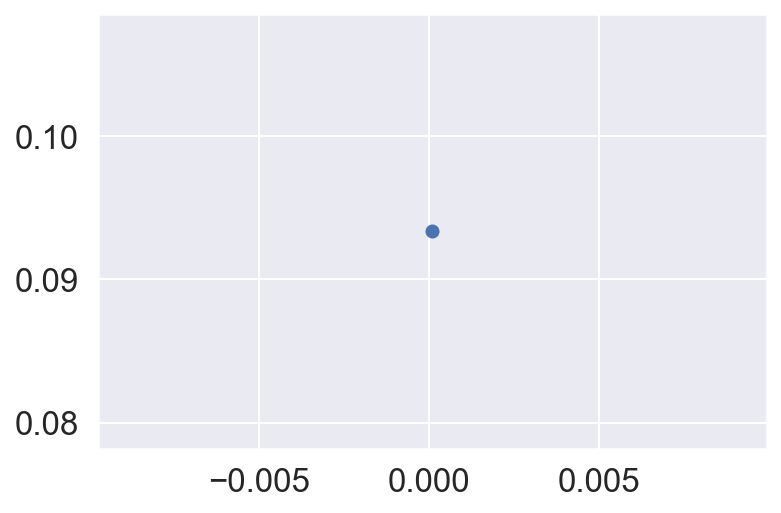

In [69]:
rmse = []
# check the below alpha values for Ridge Regression
alpha = np.arange(0.0001, 10, 200)

for alph in alpha:
    ridge = Ridge(alpha = alph, copy_X = True, fit_intercept = True)
    ridge.fit(X_train, y_train)
    predict = ridge.predict(X)
    rmse.append(np.sqrt(mean_squared_error(predict, y)))
print(rmse)
plt.scatter(alpha, rmse)
rmse = pd.Series(rmse, index = alpha)
print(rmse.argmin())
print(rmse.min())

## KNN Model

In [70]:
# trying KNN regression model with a stander scaler and grid search for multiple k values
def KNN_opt_model (X_train, X_test, y_train, y_test, test_df):
    kfold = 5
    
    print(); print(BOLD + 'K Neighbors Regressor model:' + END)

    # Create an scaler object
    ss = StandardScaler()

    # Create a logistic regression object with an L2 penalty
    KNN = neighbors.KNeighborsRegressor()

    # Create a pipeline of three steps. First, standardize the data.
    # Second, tranform the data with PCA.
    # Third, train a Decision Tree Classifier on the data.
    pipe = Pipeline(steps = [('ss', ss),
                           ('KNN', KNN)])
    
    # Create lists of parameter for KNeighborsRegressor()
    n_neighbors = [5, 10, 15]
    algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

    # Create a dictionary of all the parameter options 
    # Note has you can access the parameters of steps of a pipeline by using '__’
    parameters = dict(KNN__n_neighbors = n_neighbors,
                      KNN__algorithm = algorithm)

    # Conduct Parameter Optmization With Pipeline
    # Create a grid search object
    clf = GridSearchCV(pipe, parameters)
    
    KNN_pred = model_metrics(KNN, kfold, X_train, X_test, y_train, y_test, test_df)
    #submission_file (KNN_pred)
   

In [71]:
KNN_opt_model(X_train, X_test, y_train, y_test, test_df)


K Neighbors Regressor model:
CV scores:  [0.67401447 0.74692    0.75987174 0.75355197 0.77699215]
CV Standard Deviation:  0.03556169813381645

CV Mean score:  0.7422700672055595
Train score:    0.8330808619665064
Test score:     0.7366686357040798
CV MSE:         0.039886415426140326
CV RMSE:        0.19971583669338874


## Lasso Model

In [72]:
def lasso_optimizer(X_train, X_test, y_train, y_test, test_df, X, y):
    print(); print(BOLD + 'Optimized Lasso model:' + END)
    kfold = 5
    optimal_lasso = LassoCV(n_alphas = 500, cv = 10, verbose = 1)
    optimal_lasso.fit(X_train, y_train)
    print('optimal_lasso:    ', optimal_lasso.alpha_)
    
    # Create a logistic regression object with an L2 penalty
    lasso = Lasso(alpha = optimal_lasso.alpha_)

    lasso_pred = model_metrics(lasso, kfold,  X_train, X_test, y_train, y_test, test_df)
    submission_file(lasso_pred)
    
    lasso.fit(X, y)

    lasso_coefs = pd.DataFrame()
    lasso_coefs['Column_name'] = X.columns
    lasso_coefs['coefficient'] = lasso.coef_
    lasso_coefs['absolute_coefficient'] = np.abs(lasso.coef_)

    lasso_coefs = lasso_coefs.sort_values('absolute_coefficient', ascending = False)
    print('Percent variables zeroed out:', np.sum(lasso.coef_ == 0) / X.iloc[:, 0].count())

    lasso_coefs.head(15)
    return lasso_coefs

In [73]:
lasso_coefs = lasso_optimizer(X_train, X_test, y_train, y_test, test_df, X, y);


Optimized Lasso model:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

optimal_lasso:     0.09096833231889206
CV scores:  [0.7835964  0.82340017 0.8187395  0.84647965 0.85950013]
CV Standard Deviation:  0.026071537747746867

CV Mean score:  0.8263431714345566
Train score:    0.8343044956190907
Test score:     0.8580146951011273
CV MSE:         0.026968579908906574
CV RMSE:        0.16422113112783804
Percent variables zeroed out: 0.14344543582704186


In [74]:
lasso_coefs.head(10)

Column_name  coefficient  absolute_coefficient
7   YearRemodAdd     0.003232              0.003232
6      YearBuilt     0.002791              0.002791
1    LotFrontage     0.000540              0.000540
0     MSSubClass    -0.000451              0.000451
18      1stFlrSF     0.000393              0.000393
19      2ndFlrSF     0.000368              0.000368
33    GarageArea     0.000263              0.000263
13    BsmtFinSF1     0.000228              0.000228
41   ScreenPorch     0.000214              0.000214
38   OpenPorchSF     0.000176              0.000176

## Elastic Net Model

In [75]:
def ElasticNet__optimizer(X_train, X_test, y_train, y_test, test_df, X, y):
    
    kfold = 5
    
    l1_ratios = np.linspace(0.01, 1.0, 25)

    optimal_enet = ElasticNetCV(l1_ratio = l1_ratios, n_alphas = 100, cv = 10, verbose = 1)
    optimal_enet.fit(X, y)

    print(); print(BOLD + 'Elastic Net model:' + END)
    print('Optimal alpha:       ', optimal_enet.alpha_)
    print('Optimal l1 ratio  :  ', optimal_enet.l1_ratio_)
    
    enet = ElasticNet(alpha = optimal_enet.alpha_, l1_ratio = optimal_enet.l1_ratio_)
    

    enet_pred = model_metrics(enet, kfold,  X_train, X_test, y_train, y_test, test_df)
    #submission_file (enet_pred)

In [76]:
ElasticNet__optimizer(X_train, X_test, y_train, y_test, test_df, X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................


Elastic Net model:
Optimal alpha:        0.09092791244517444
Optimal l1 ratio  :   1.0
CV scores:  [0.78360095 0.82340668 0.81873891 0.84648228 0.85950216]
CV Standard Deviation:  0.026070855232836355

CV Mean score:  0.8263461942851968
Train score:    0.8343100868313357
Test score:     0.8580179605881441
CV MSE:         0.026968151785284854
CV RMSE:        0.1642198276253049


## Decision Tree Regressor Model

In [77]:
#Applying DecisionTreeRegressor Model 

print(BOLD + 'Decision Tree Regressor model:' + END)


decision_tree = DecisionTreeRegressor( max_depth = 10, random_state = 33)
decision_tree.fit(X_train, y_train)

#Calculating Training & Testing Scores
print('Train Score: ', decision_tree.score(X_train, y_train))
print('Test Score is : ', decision_tree.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = decision_tree.predict(X_test)

#----------------------------------------------------
#Calculating MAE
MAE_value = mean_absolute_error(y_test, y_pred, multioutput = 'uniform_average') 
print('MAE Score: ', MAE_value)

#----------------------------------------------------
#Calculating MSE
MSE_value = mean_squared_error(y_test, y_pred, multioutput = 'uniform_average') 
print('MSE Score: ', MSE_value)



Decision Tree Regressor model:
Train Score:  0.9776297470147285
Test Score is :  0.7806139999388007
----------------------------------------------------
MAE Score:  0.14114577898071612
MSE Score:  0.038728158163031816


## Evaluation and Conceptual Understanding

After evaluating all of the applied models, we can confidently say that the best model without any competitors was Ridge with the optimal alpha value. The rest of the Lasso and ElasticNet performed slightly worst that ridge, even after finding the optimal alpha. Other models like KNN and leaner regression did not perform well. Decision tree and random forest had overfitting as the train scores were too hight compared to the test. The below scores were for the best preforming model (Ridge) that got us the RMSE of  0.11890

* Ridge model (best so far with 0.12100 kaggle score):
* Optimal Alpha:    12.216773489967919
* CV scores:  [0.89327908 0.89926145 0.90971806 0.93280416 0.9311133 ]
* CV Standard Deviation:  0.016176855310963398
* CV Mean score:  0.913235211102004
* Train score:    0.9375894112878308
* Test score:     0.9321056236353693
* CV MSE:         0.013403207809351957
* CV RMSE:        0.11577222382485342
* [117563.4133125  155207.48419969 181581.10791461 ... 173173.10705228
 115697.95594533 223288.03456509]

## Conclusion


As a second project in our Data Science Immersive Course with General Assembly and MiSK Academy, we were asked to finish this "House Prices" Competition in Kaggle, We used multiple data cleaning methods, employed (EDA) methods including a good number of visualizations, to get to know the data well, and we preprocessed our dataset with some transformation methods. Finally, we applied multiple machine learning methods in order to predict the Sale Price of the houses in the test data set. The regrission models used were Linear, Ridge, Lasso, Elastic Net, KNN, Decision Tree, Random Forest and a few more models. We achieved an amazing score in Kaggle competition that we are very proud of, we were ranked as the 607th out of 4,675 teams. 
 
 Root-Mean-Squared-Error (RMSE)  = 0.11890
 
Thank you very mcuh,
Raghad, Fatmah, Hessah
 